## Decoding Arrest Decisions in Terry Traffic Stops

## Project Overview

The Terry Traffic Stops project aims to unravel the complex dynamics behind police decisions during traffic stops, particularly focusing on whether an arrest is made. Building on the legal precedent set by Terry v. Ohio, which introduced the concept of "reasonable suspicion," the project develops a machine learning model to predict the likelihood of arrest following a stop.

Using a rich dataset that includes details such as the stop’s context, demographics, and circumstances, the model seeks to identify patterns and key factors influencing these critical decisions. Beyond understanding police behavior, the project aspires to inform policy, promote fairness, and enhance transparency in law enforcement practices. Through this analysis, the Terry Traffic Stops project contributes to the broader conversation on policing and civil rights.

## Business Problem

Terry Stops, rooted in the principle of “reasonable suspicion,” allow police officers to temporarily detain individuals for investigation. However, the decision to escalate a stop to an arrest can be influenced by a variety of factors, some of which may not be immediately clear or consistent. This project seeks to address the complexities involved in these critical decisions through a multifaceted approach:

1. **Identifying Key Factors**: The project aims to determine the primary factors that influence whether an arrest is made following a Terry Stop. These factors could range from situational elements, such as time and location, to individual characteristics, including behavior and demeanor during the stop. Understanding these variables is crucial for identifying patterns and ensuring that decisions are made based on objective criteria.

2. **Predictive Modeling**: To systematically analyze these factors, the project will develop a binary classification model capable of predicting the likelihood of an arrest. By leveraging historical data, this model will provide a data-driven approach to anticipate outcomes, allowing law enforcement agencies to understand the potential impact of various factors on arrest decisions.

3. **Policy Evaluation**: A key focus of the project is to provide insights into the role of demographic factors, such as race and gender, in arrest decisions. By examining these elements, the project will help ensure that arrest decisions are fair and unbiased, fostering greater transparency and addressing ethical concerns in policing practices.

4. **Resource Allocation**: Understanding the patterns and factors that lead to arrests can also assist law enforcement agencies in better allocating their resources. By identifying areas where arrests are more likely or understanding the circumstances that typically lead to such outcomes, agencies can deploy their personnel more effectively and make informed decisions about training and policy development.


## Research Questions:

1. **Prediction Accuracy**: How well can we predict whether a traffic stop will occur using factors like location, time of day, and demographic information?

2. **Key Influences**: Which factors are most important in predicting traffic stops? Are there any surprising trends or patterns?

3. **Bias and Fairness**: Does the model show any bias in its predictions? For example, does it unfairly target certain groups of drivers more than others?


## Data Understanding Overview
In this phase, we explore the Terry Traffic Stops dataset to gain insights into the variables that describe police interactions during traffic stops. The dataset includes detailed information on both the individuals stopped and the officers involved, covering demographics, stop outcomes, and geographical data. By examining these features, we aim to identify key factors that influence stop outcomes, assess potential biases, and prepare the data for further analysis and modeling

1. **Subject Age Group**: Categorizes the age of the individual involved in the stop.
2. **Subject ID**: Unique identifier for each individual stopped.
3. **GO / SC Num**: Case or report number associated with the stop.
4. **Terry Stop ID**: Unique identifier for each specific Terry Stop event.
5. **Stop Resolution**: Outcome of the stop (e.g., arrest, warning).
6. **Weapon Type**: Type of weapon found, if any, during the stop.
7. **Officer ID**: Unique identifier for the officer conducting the stop.
8. **Officer YOB**: Year of birth of the officer involved in the stop.
9. **Officer Gender**: Gender of the officer involved in the stop.
10. **Officer Race**: Race of the officer conducting the stop.
11. **Subject Perceived Race**: Race of the individual as perceived by the officer.
12. **Subject Perceived Gender**: Gender of the individual as perceived by the officer.
13. **Reported Date**: Date when the stop was reported.
14. **Reported Time**: Time of day when the stop was reported.
15. **Initial Call Type**: Reason for the initial call that led to the stop.
16. **Final Call Type**: Nature of the call after the stop was resolved.
17. **Call Type**: General category of the call or incident.
18. **Officer Squad**: The squad or unit to which the officer belongs.
19. **Arrest Flag**: Indicator of whether the stop resulted in an arrest.
20. **Frisk Flag**: Indicator of whether the individual was frisked during the stop.
21. **Precinct**: The police precinct where the stop took place.
22. **Sector**: Sub-division within a precinct for geographical analysis.
23. **Beat**: Smallest geographical area of police patrol.


## Step 1: Import all the Necessary Libraries

In [64]:
# Importing essential libraries for data handling and analysis
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

In [65]:
# Load the dataset and print out the first few rows of our data
df = pd.read_csv("Terry_Traffic_Stops.csv")

# Display the first few rows to verify the data
df.head()

Subject Age Group   Subject ID     GO / SC Num  Terry Stop ID  \
0           36 - 45   7732696346  20190000315233     9803669705   
1           46 - 55   8295859194  20190000207006     8299762394   
2           26 - 35           -1  20170000002886         467843   
3            1 - 17           -1  20180000275743         472723   
4           36 - 45  16227498273  20220000263279    37099192062   

  Stop Resolution Weapon Type Officer ID  Officer YOB Officer Gender  \
0   Field Contact           -       4161         1957              M   
1          Arrest           -       6404         1971              M   
2   Field Contact         NaN       7430         1984              F   
3  Offense Report         NaN       5151         1962              M   
4          Arrest           -       7655         1982              M   

                    Officer Race  ...     Reported Time  \
0  American Indian/Alaska Native  ...  10:47:39.0000000   
1                          White  ...  17:08:12.0000000   
2                          White  ...  17:48:00.0000000   
3                          White  ...  11:49:00.0000000   
4  Nat Hawaiian/Oth Pac Islander  ...  22:18:36.0000000   

                            Initial Call Type  \
0  SUSPICIOUS STOP - OFFICER INITIATED ONVIEW   
1                        BURG - OCCUPIED RESD   
2                                           -   
3                                           -   
4                            SHOPLIFT - THEFT   

                            Final Call Type Call Type  \
0  --SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON    ONVIEW   
1                    --PROPERTY DEST (DAMG)       911   
2                                         -         -   
3                                         -         -   
4   --BURGLARY - NON RESIDENTIAL/COMMERCIAL    ONVIEW   

                               Officer Squad Arrest Flag Frisk Flag  \
0          WEST PCT 1ST W - KING - PLATOON 1           N          N   
1  NORTH PCT 2ND W - NORA (JOHN) - PLATOON 1           Y          N   
2          NORTH PCT 2ND WATCH - NORTH BEATS           N          Y   
3  SOUTHWEST PCT 1ST W - WILLIAM - PLATOON 2           N          N   
4    SOUTHWEST PCT 2ND W - FRANK - PLATOON 2           Y          N   

    Precinct Sector Beat  
0       West      K   K2  
1      North      N   N3  
2          -      -    -  
3  Southwest      F   F1  
4  Southwest      F   F2  

[5 rows x 23 columns]

Lets have a general overview of our dataset

In [66]:

class DataFrameInspector:
    def __init__(self, file_path):
        # Initialize the class with the file path and load the DataFrame
        self.file_path = file_path
        self.df = pd.read_csv(file_path)

    def display_info(self):
        # Display basic information about the DataFrame
        print("DataFrame Info:")
        self.df.info()

    def show_head(self, n=5):
        # Show the first n rows of the DataFrame
        print(f"\nFirst {n} rows:")
        print(self.df.head(n))

    def show_basic_stats(self):
        # Display summary statistics for numerical columns
        print("\nBasic statistics:")
        print(self.df.describe())

    def count_null_values(self):
        # Count the number of null values in each column
        print("\nNull values per column:")
        print(self.df.isnull().sum())

    def count_unique_values(self):
        # Count the number of unique values in each column
        print("\nUnique values per column:")
        print(self.df.nunique())

    def inspect_all(self):
        # Run all inspection methods
        self.display_info()
        self.show_head()
        self.show_basic_stats()
        self.count_null_values()
        self.count_unique_values()

inspector = DataFrameInspector('Terry_Traffic_Stops.csv')
inspector.inspect_all()

# Alternatively, you can call individual methods:
# inspector.display_info()
# inspector.show_head(10)  # Show first 10 rows
# inspector.show_basic_stats()
# inspector.count_null_values()
# inspector.count_unique_values()

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61021 entries, 0 to 61020
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Subject Age Group         61021 non-null  object
 1   Subject ID                61021 non-null  int64 
 2   GO / SC Num               61021 non-null  int64 
 3   Terry Stop ID             61021 non-null  int64 
 4   Stop Resolution           61021 non-null  object
 5   Weapon Type               28456 non-null  object
 6   Officer ID                61021 non-null  object
 7   Officer YOB               61021 non-null  int64 
 8   Officer Gender            61021 non-null  object
 9   Officer Race              61021 non-null  object
 10  Subject Perceived Race    61021 non-null  object
 11  Subject Perceived Gender  61021 non-null  object
 12  Reported Date             61021 non-null  object
 13  Reported Time             61021 non-null  object
 14  Initia

## Data Understanding: General overview

1. Dataset Overview

The Terry Traffic Stops dataset contains a comprehensive record of 61,021 police stops. This data is organized across 23 columns, providing a detailed view of each incident.

2. Data Structure

The dataset's structure comprises 4 integer columns and 19 object columns. The object columns likely contain strings or mixed data types, allowing for a diverse range of information to be captured.

3. Missing Data

While most columns are complete, there are two notable exceptions. The "Weapon Type" column has the highest number of null values at 32,565, suggesting that weapon information is not always available or applicable. Additionally, the "Officer Squad" column has 561 missing entries.

4. Key Column Categories

4.1 Subject Information
The dataset includes details about the subjects of the stops, such as their age group, ID, perceived race, and perceived gender.

4.2 Officer Details
Information about the officers conducting the stops is also recorded, including their ID, year of birth (YOB), gender, and race.

4.3 Stop Characteristics
Each stop is documented with a unique Terry Stop ID, along with the stop resolution and the reported date and time.

4.4 Location Data
The geographic context of each stop is captured through precinct, sector, and beat information.

5. Numerical Insights

The "Officer YOB" column provides interesting demographic data about the police force. Birth years range from 1900 to 2002, with a mean of 1984. Both the Subject ID and Terry Stop ID columns show a wide range of values, likely serving as unique identifiers for each entry.

6. Categorical Data Highlights

Several columns offer insights into the nature of the stops and the diversity of those involved:
- Stop Resolution has 5 unique categories, indicating various outcomes of the stops.
- There are 9 distinct precincts represented in the data.
- Officer Race is categorized into 9 groups.
- Subject Perceived Race has 11 unique categories, suggesting a detailed approach to recording racial data.

7. Flag Columns

The dataset includes two flag columns that provide quick reference points:
- Arrest Flag is binary, indicating whether an arrest was made.
- Frisk Flag has 3 unique values, potentially indicating different levels or types of frisking procedures.

## Column classification

In [67]:
def classify_columns(file_path):
    # Read the CSV file
    df = pd.read_csv(file_path)

    # Initialize lists to store column names
    numerical_columns = []
    categorical_columns = []

    # Iterate through each column
    for column in df.columns:
        # Check if the column is numerical
        if df[column].dtype in ['int64', 'float64']:
            numerical_columns.append(column)
        else:
            # Check if the column is categorical
            if df[column].dtype == 'object' or df[column].dtype.name == 'category':
                categorical_columns.append(column)
            # If it's neither numerical nor categorical (e.g., datetime), you can add more conditions here

    # Print the results
    print("Numerical columns:")
    for col in numerical_columns:
        print(f"- {col}")

    print("\nCategorical columns:")
    for col in categorical_columns:
        print(f"- {col}")

    # Return the lists if you need to use them later
    return numerical_columns, categorical_columns

# Usage
file_path = 'Terry_Traffic_Stops.csv'
num_cols, cat_cols = classify_columns(file_path)

Numerical columns:
- Subject ID
- GO / SC Num
- Terry Stop ID
- Officer YOB

Categorical columns:
- Subject Age Group
- Stop Resolution
- Weapon Type
- Officer ID
- Officer Gender
- Officer Race
- Subject Perceived Race
- Subject Perceived Gender
- Reported Date
- Reported Time
- Initial Call Type
- Final Call Type
- Call Type
- Officer Squad
- Arrest Flag
- Frisk Flag
- Precinct
- Sector
- Beat


### Dataset Classification Overview

The dataset is composed of two primary types of columns: **Numerical** and **Categorical**.

- **Numerical Columns:** These columns consist of data that represent measurable quantities or unique identifiers. They typically include values that can be used for mathematical operations, such as calculating averages or identifying unique instances.

- **Categorical Columns:** These columns contain data that represent distinct groups or categories. Categorical data is used to classify and label information, often representing qualitative aspects of the dataset, such as characteristics, types, or outcomes.

Understanding these categories is crucial for selecting the right analytical and modeling techniques, as numerical and categorical data often require different approaches.


# Step 2: Data Cleaning

Identify and handle missing values

Scrub the data to remove any inaccuracies or inconsistencies

Transform and organize the data into a standardized format for analysis

Enhance the quality and usability of the data through restructuring and formatting adjustments.

## 2.1 Handling Missing Values

In [68]:
#Checking correlation between missing values and another feature
df['Weapon_Type_Missing'] = df['Weapon Type'].isna()
df.groupby('Precinct')['Weapon_Type_Missing'].mean()


Precinct
-            0.813030
East         0.505514
FK ERROR     0.000000
North        0.579929
OOJ          0.000000
South        0.497290
Southwest    0.460560
Unknown      0.950000
West         0.371315
Name: Weapon_Type_Missing, dtype: float64

### Interpretation of Missing Values in the "Weapon Type" Column

The output shows the mean proportion of missing values in the **Weapon Type** column for each **Precinct**. Here’s what the results imply:

1. **High Proportion of Missing Values in Some Precincts:**
   - **"-" Precinct:** About **81.3%** of the rows for this precinct have missing values in the **Weapon Type** column. This is a very high proportion, indicating that most data for this precinct is missing for this feature.
   - **"Unknown" Precinct:** About **95%** of the data for this precinct is missing in the **Weapon Type** column, suggesting a severe lack of data for this feature in this group.

2. **Moderate Proportion of Missing Values:**
   - **East, North, South Precincts:** Around **50-58%** of the data is missing in the **Weapon Type** column for these precincts, which is a significant amount that might affect the model if these rows are dropped.

3. **Low to No Missing Values:**
   - **"FK ERROR" and "OOJ" Precincts:** Both have **0%** missing values, indicating that all data for the **Weapon Type** column is available.
   - **"West" and "Southwest" Precincts:** Have around **37.1% and 46.1%** missing values, respectively, which is still substantial but lower than in other precincts.

### Implications for the Data and the Model

- **Non-Random Missing Data:**  
  The varying proportions of missing values across precincts suggest that the missingness is not random. Certain precincts, such as **"-"** and **"Unknown"**, have a much higher likelihood of missing **Weapon Type** data, which could indicate underlying patterns or data collection issues. Dropping these rows could introduce bias into the model, particularly against precincts with high rates of missing data, potentially leading to skewed predictions.

- **Potential Bias Introduction:**  
  Since missing values are not uniformly distributed, removing them could disproportionately affect the representation of certain precincts. This could reduce the model’s accuracy or fairness by excluding relevant data, especially if **Weapon Type** is an important predictor of the outcome.

### Actionable Next Steps

- **Imputation Strategy:**  
  Consider imputing missing values using a placeholder ("Unknown") or filling in based on patterns in the data (e.g., the most common **Weapon Type** within each precinct).

- **Feature Engineering:**  
  Create a binary feature indicating whether **Weapon Type** is missing, as this could provide valuable information about the nature of stops in specific precincts.


In [69]:
# Feature engineering
# 1. Create a binary indicator for missing 'Weapon Type'
df['Weapon_Type_Missing'] = df['Weapon Type'].isna().astype(int)

# 2. Impute missing 'Weapon Type' values with a placeholder
df['Weapon Type'].fillna('Unknown', inplace=True)

# 3. Feature engineering: Create interaction feature between 'Weapon Type' and 'Precinct'
df['Weapon_Precinct_Interaction'] = df['Weapon Type'] + '_' + df['Precinct']

# 4. Feature engineering: Extract date-related features from 'Reported Date'
df['Reported_Year'] = pd.to_datetime(df['Reported Date']).dt.year
df['Reported_Month'] = pd.to_datetime(df['Reported Date']).dt.month
df['Reported_Day'] = pd.to_datetime(df['Reported Date']).dt.day

# 5. Feature engineering: Extract time-related features from 'Reported Time'
# Use `errors='coerce'` to handle any inconsistent formats
df['Reported_Hour'] = pd.to_datetime(df['Reported Time'], errors='coerce').dt.hour

# Verify the newly created features
print(df[['Weapon Type', 'Weapon_Type_Missing', 'Weapon_Precinct_Interaction', 
          'Reported_Year', 'Reported_Month', 'Reported_Day', 'Reported_Hour']].head())


C:\Users\ronoe\AppData\Local\Temp\ipykernel_18240\2960947321.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Weapon Type'].fillna('Unknown', inplace=True)
C:\Users\ronoe\AppData\Local\Temp\ipykernel_18240\2960947321.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Reported_Hour'] = pd.to_datetime(df['Reported Time'], errors='coerce').dt.hour


  Weapon Type  Weapon_Type_Missing Weapon_Precinct_Interaction  Reported_Year  \
0           -                    0                      -_West           2019   
1           -                    0                     -_North           2019   
2     Unknown                    1                   Unknown_-           2017   
3     Unknown                    1           Unknown_Southwest           2018   
4           -                    0                 -_Southwest           2022   

   Reported_Month  Reported_Day  Reported_Hour  
0               8            24             10  
1               6             7             17  
2               7             7             17  
3               8            20             11  
4              10             1             22  


In [70]:
# Count missing values before dropping
missing_count = df['Officer Squad'].isnull().sum()

# Drop rows with missing values in 'Officer Squad'
df = df.dropna(subset=['Officer Squad'])

# Verify the drop
remaining_count = len(df)

In our analysis of the Terry Traffic Stops dataset, we encountered missing values in the 'Officer Squad' column. After careful consideration, we decided to drop these rows with missing values. Here's why:

### 1. Small Proportion of Missing Data

- Total rows in the dataset: 61,021
- Rows with missing 'Officer Squad' data: 561
- Percentage of missing data: 0.92%

With less than 1% of the data missing, removing these rows is unlikely to significantly impact our analysis or introduce bias.

### 2. Preserving Data Integrity

By removing incomplete records, we ensure that all remaining data points have complete information for the 'Officer Squad' variable. This is crucial for maintaining the integrity of our analysis, especially if the officer's squad is an important factor in our study.

### 3. Avoiding Assumptions

Dropping the rows avoids making potentially incorrect assumptions about the missing data. Methods like imputation or creating a separate 'Unknown' category might introduce bias or noise into our analysis.

### 4. Simplicity and Transparency

This approach is straightforward and easy to explain, enhancing the transparency and reproducibility of our analysis. It doesn't require complex imputation techniques that might be difficult to justify or interpret.

### 5. Minimal Impact on Statistical Power

Given the large size of our dataset (over 60,000 rows), removing 561 rows is unlikely to significantly reduce the statistical power of our analyses.

### 6. Clean Dataset for Analysis

By working with a complete dataset, we simplify subsequent analysis steps and reduce the risk of errors or unexpected behavior due to missing values.

### Impact on Analysis

- Final dataset size: 60,460 rows
- All subsequent analyses will be performed on this cleaned dataset


## Cleaning the 'Subject Age Group' Column

We're extracting the lower bound of the age range from the 'Subject Age Group' column for several important reasons:

1. **Consistency**: By using the lower bound, we create a consistent numerical representation of age groups.

2. **Simplification**: This simplifies the data while retaining the essential age category information.

3. **Ease of Analysis**: Numerical values are easier to work with in many statistical analyses and machine learning models.

4. **Ordinal Nature**: The lower bound preserves the ordinal nature of age groups, allowing for meaningful comparisons.

5. **Improved Visualization**: Simplified age groups can lead to clearer and more interpretable visualizations.

6. **Potential for Binning**: If needed, we can easily create broader age categories from these numerical values.

This cleaning step prepares the age data for more effective use in our analysis of traffic stop patterns and potential biases.

## 3.1 Exploratory Data Analysis



In [71]:
# Subject Age Group (already represents ranges)
df['Age Group'] = df['Subject Age Group'].str.split(' - ').str[0]  # Extract the lower bound of the range

df.head()

Subject Age Group   Subject ID     GO / SC Num  Terry Stop ID  \
0           36 - 45   7732696346  20190000315233     9803669705   
1           46 - 55   8295859194  20190000207006     8299762394   
2           26 - 35           -1  20170000002886         467843   
3            1 - 17           -1  20180000275743         472723   
4           36 - 45  16227498273  20220000263279    37099192062   

  Stop Resolution Weapon Type Officer ID  Officer YOB Officer Gender  \
0   Field Contact           -       4161         1957              M   
1          Arrest           -       6404         1971              M   
2   Field Contact     Unknown       7430         1984              F   
3  Offense Report     Unknown       5151         1962              M   
4          Arrest           -       7655         1982              M   

                    Officer Race  ...   Precinct Sector Beat  \
0  American Indian/Alaska Native  ...       West      K   K2   
1                          White  ...      North      N   N3   
2                          White  ...          -      -    -   
3                          White  ...  Southwest      F   F1   
4  Nat Hawaiian/Oth Pac Islander  ...  Southwest      F   F2   

  Weapon_Type_Missing Weapon_Precinct_Interaction Reported_Year  \
0                   0                      -_West          2019   
1                   0                     -_North          2019   
2                   1                   Unknown_-          2017   
3                   1           Unknown_Southwest          2018   
4                   0                 -_Southwest          2022   

  Reported_Month Reported_Day Reported_Hour Age Group  
0              8           24            10        36  
1              6            7            17        46  
2              7            7            17        26  
3              8           20            11         1  
4             10            1            22        36  

[5 rows x 30 columns]

## 3.2 Dropping irrelevant columns

We'll drop columns that don't affect customer churn (RowNumber, CustomerId, Surname).

In [72]:
# Drop irrelevant columns
#'Officer YOB',  # Might be useful as 'Officer Experience'
#'Reported Date',  # Might be redundant with derived features
#'Reported Time',  # Might be redundant with derived features
# Drop the safe_to_drop columns permanently

irrelevant_columns = ['Subject ID', 'GO / SC Num', 'Terry Stop ID', 'Officer ID', 'Initial Call Type', 'Final Call Type', 'Call Type', 'Officer Squad', 'Precinct', 'Sector', 'Beat']
df = df.drop(irrelevant_columns, axis=1)

# Verify the DataFrame after dropping columns
print(df.head())

  Subject Age Group Stop Resolution Weapon Type  Officer YOB Officer Gender  \
0           36 - 45   Field Contact           -         1957              M   
1           46 - 55          Arrest           -         1971              M   
2           26 - 35   Field Contact     Unknown         1984              F   
3            1 - 17  Offense Report     Unknown         1962              M   
4           36 - 45          Arrest           -         1982              M   

                    Officer Race     Subject Perceived Race  \
0  American Indian/Alaska Native                          -   
1                          White                      White   
2                          White                      White   
3                          White  Black or African American   
4  Nat Hawaiian/Oth Pac Islander                      White   

  Subject Perceived Gender         Reported Date     Reported Time  \
0                     Male  2019-08-24T00:00:00Z  10:47:39.0000000   
1     

### Considerations for Dropping Potential Features

After further analysis, the features listed in **`potential_drops`** could potentially increase model complexity without significantly improving its performance due to the following reasons:

- **Overfitting and Complexity:**
  - **Larger Models:** Including more features can lead to larger models, increasing the risk of overfitting—where the model performs well on training data but poorly on unseen data.
  - **Training Time:** Training a complex model with many features takes longer and requires more computational resources.

- **Redundant Information:**
  - **Overlapping Features:** Some features may contain similar or redundant information. For example, "Reported Date" and "Reported Time" can be effectively combined into simpler features like "Day of Week" or "Time of Day."
  - **Difficult Categorical Features:** Categorical features with many unique categories may be challenging for models to interpret and learn from effectively.

- **Privacy Concerns:**
  - **Location Information:** Features such as "Officer Squad" or "Precinct" could contain sensitive location data, which may require aggregation into larger geographical units to address privacy concerns.

### Feature Engineering: Creating a Binary 'Arrested' Column

Before handling missing values, we noticed a correlation between the columns **'Stop Resolution'** and **'Arrest Flag'**. To capture this relationship, we can create a new binary **'Arrested'** column to indicate whether an arrest was made.


Let's create a binary column "Arrested" based on the correlation between "Stop Resolution" and "Arrest Flag"

In [73]:
# Feature engineering
# Creating the 'Arrested' column based on the 'Stop Resolution' and 'Arrest Flag'
df['Arrested'] = ((df['Stop Resolution'].str.contains('Arrest', case=False, na=False)) | (df['Arrest Flag'] == 1)).astype(int)

# Verify the new column by displaying the first few rows
print(df[['Stop Resolution', 'Arrest Flag', 'Arrested']].head())


  Stop Resolution Arrest Flag  Arrested
0   Field Contact           N         0
1          Arrest           Y         1
2   Field Contact           N         0
3  Offense Report           N         0
4          Arrest           Y         1



1. **`Frisk Flag` Transformation:**
   - Converts the **`Frisk Flag`** column from categorical values ('Y' for yes, others for no) to binary values (`1` for "Yes" and `0` for "No").
   - **Purpose:** Simplifies the data into a numeric format suitable for machine learning models, which typically perform better with numerical inputs.

2. **`Weapon Type` Transformation:**
   - Replaces the placeholder `'-'` in the **`Weapon Type`** column with `'None'` to clearly indicate that no weapon was found.
   - **Purpose:** Improves data clarity by using a meaningful label (`'None'`), making it easier to interpret and analyze the data.


In [74]:

# Transform 'Frisk Flag' to binary values (1 for 'Y', 0 otherwise)
df['Frisk Flag'] = df['Frisk Flag'].map(lambda x: 1 if x == 'Y' else 0)

# Replace missing or placeholder values in 'Weapon Type' with 'None'
df['Weapon Type'] = df['Weapon Type'].map(lambda x: 'None' if x == '-' else x)

# Verify the changes by displaying the first few rows
print(df[['Frisk Flag', 'Weapon Type']].head())


   Frisk Flag Weapon Type
0           0        None
1           0        None
2           1     Unknown
3           0     Unknown
4           0        None


In [75]:
df.head()

Subject Age Group Stop Resolution Weapon Type  Officer YOB Officer Gender  \
0           36 - 45   Field Contact        None         1957              M   
1           46 - 55          Arrest        None         1971              M   
2           26 - 35   Field Contact     Unknown         1984              F   
3            1 - 17  Offense Report     Unknown         1962              M   
4           36 - 45          Arrest        None         1982              M   

                    Officer Race     Subject Perceived Race  \
0  American Indian/Alaska Native                          -   
1                          White                      White   
2                          White                      White   
3                          White  Black or African American   
4  Nat Hawaiian/Oth Pac Islander                      White   

  Subject Perceived Gender         Reported Date     Reported Time  \
0                     Male  2019-08-24T00:00:00Z  10:47:39.0000000   
1                     Male  2019-06-07T00:00:00Z  17:08:12.0000000   
2                     Male  2017-07-07T00:00:00Z  17:48:00.0000000   
3                   Female  2018-08-20T00:00:00Z  11:49:00.0000000   
4                     Male  2022-10-01T00:00:00Z  22:18:36.0000000   

  Arrest Flag  Frisk Flag  Weapon_Type_Missing Weapon_Precinct_Interaction  \
0           N           0                    0                      -_West   
1           Y           0                    0                     -_North   
2           N           1                    1                   Unknown_-   
3           N           0                    1           Unknown_Southwest   
4           Y           0                    0                 -_Southwest   

   Reported_Year  Reported_Month  Reported_Day  Reported_Hour Age Group  \
0           2019               8            24             10        36   
1           2019               6             7             17        46   
2           2017               7             7             17        26   
3           2018               8            20             11         1   
4           2022              10             1             22        36   

   Arrested  
0         0  
1         1  
2         0  
3         0  
4         1

Let's transform our month and time column for compatibility with machine learning models

In [76]:

df['Reported Month'] = df['Reported Date'].map(lambda x: int(x[5:7]))
df.drop('Reported Date', axis=1, inplace=True)

df['Reported Hour'] = df['Reported Time'].map(lambda x: int(x[:2]))
df.drop('Reported Time', axis = 1, inplace=True)

df.head()

Subject Age Group Stop Resolution Weapon Type  Officer YOB Officer Gender  \
0           36 - 45   Field Contact        None         1957              M   
1           46 - 55          Arrest        None         1971              M   
2           26 - 35   Field Contact     Unknown         1984              F   
3            1 - 17  Offense Report     Unknown         1962              M   
4           36 - 45          Arrest        None         1982              M   

                    Officer Race     Subject Perceived Race  \
0  American Indian/Alaska Native                          -   
1                          White                      White   
2                          White                      White   
3                          White  Black or African American   
4  Nat Hawaiian/Oth Pac Islander                      White   

  Subject Perceived Gender Arrest Flag  Frisk Flag  Weapon_Type_Missing  \
0                     Male           N           0                    0   
1                     Male           Y           0                    0   
2                     Male           N           1                    1   
3                   Female           N           0                    1   
4                     Male           Y           0                    0   

  Weapon_Precinct_Interaction  Reported_Year  Reported_Month  Reported_Day  \
0                      -_West           2019               8            24   
1                     -_North           2019               6             7   
2                   Unknown_-           2017               7             7   
3           Unknown_Southwest           2018               8            20   
4                 -_Southwest           2022              10             1   

   Reported_Hour Age Group  Arrested  Reported Month  Reported Hour  
0             10        36         0               8             10  
1             17        46         1               6             17  
2             17        26         0               7             17  
3             11         1         0               8             11  
4             22        36         1              10             22

## 3.3 Univariate Analysis

- **Distribution Plots:** Visualize the distribution of numerical features and check for outliers in the dataset.
- **Statistical summary:** Generate descriptive statistics of the numerical features in the dataset.
- **Frequency Counts:** Explore the frequency counts of categorical features and detect rare categories in the dataset.

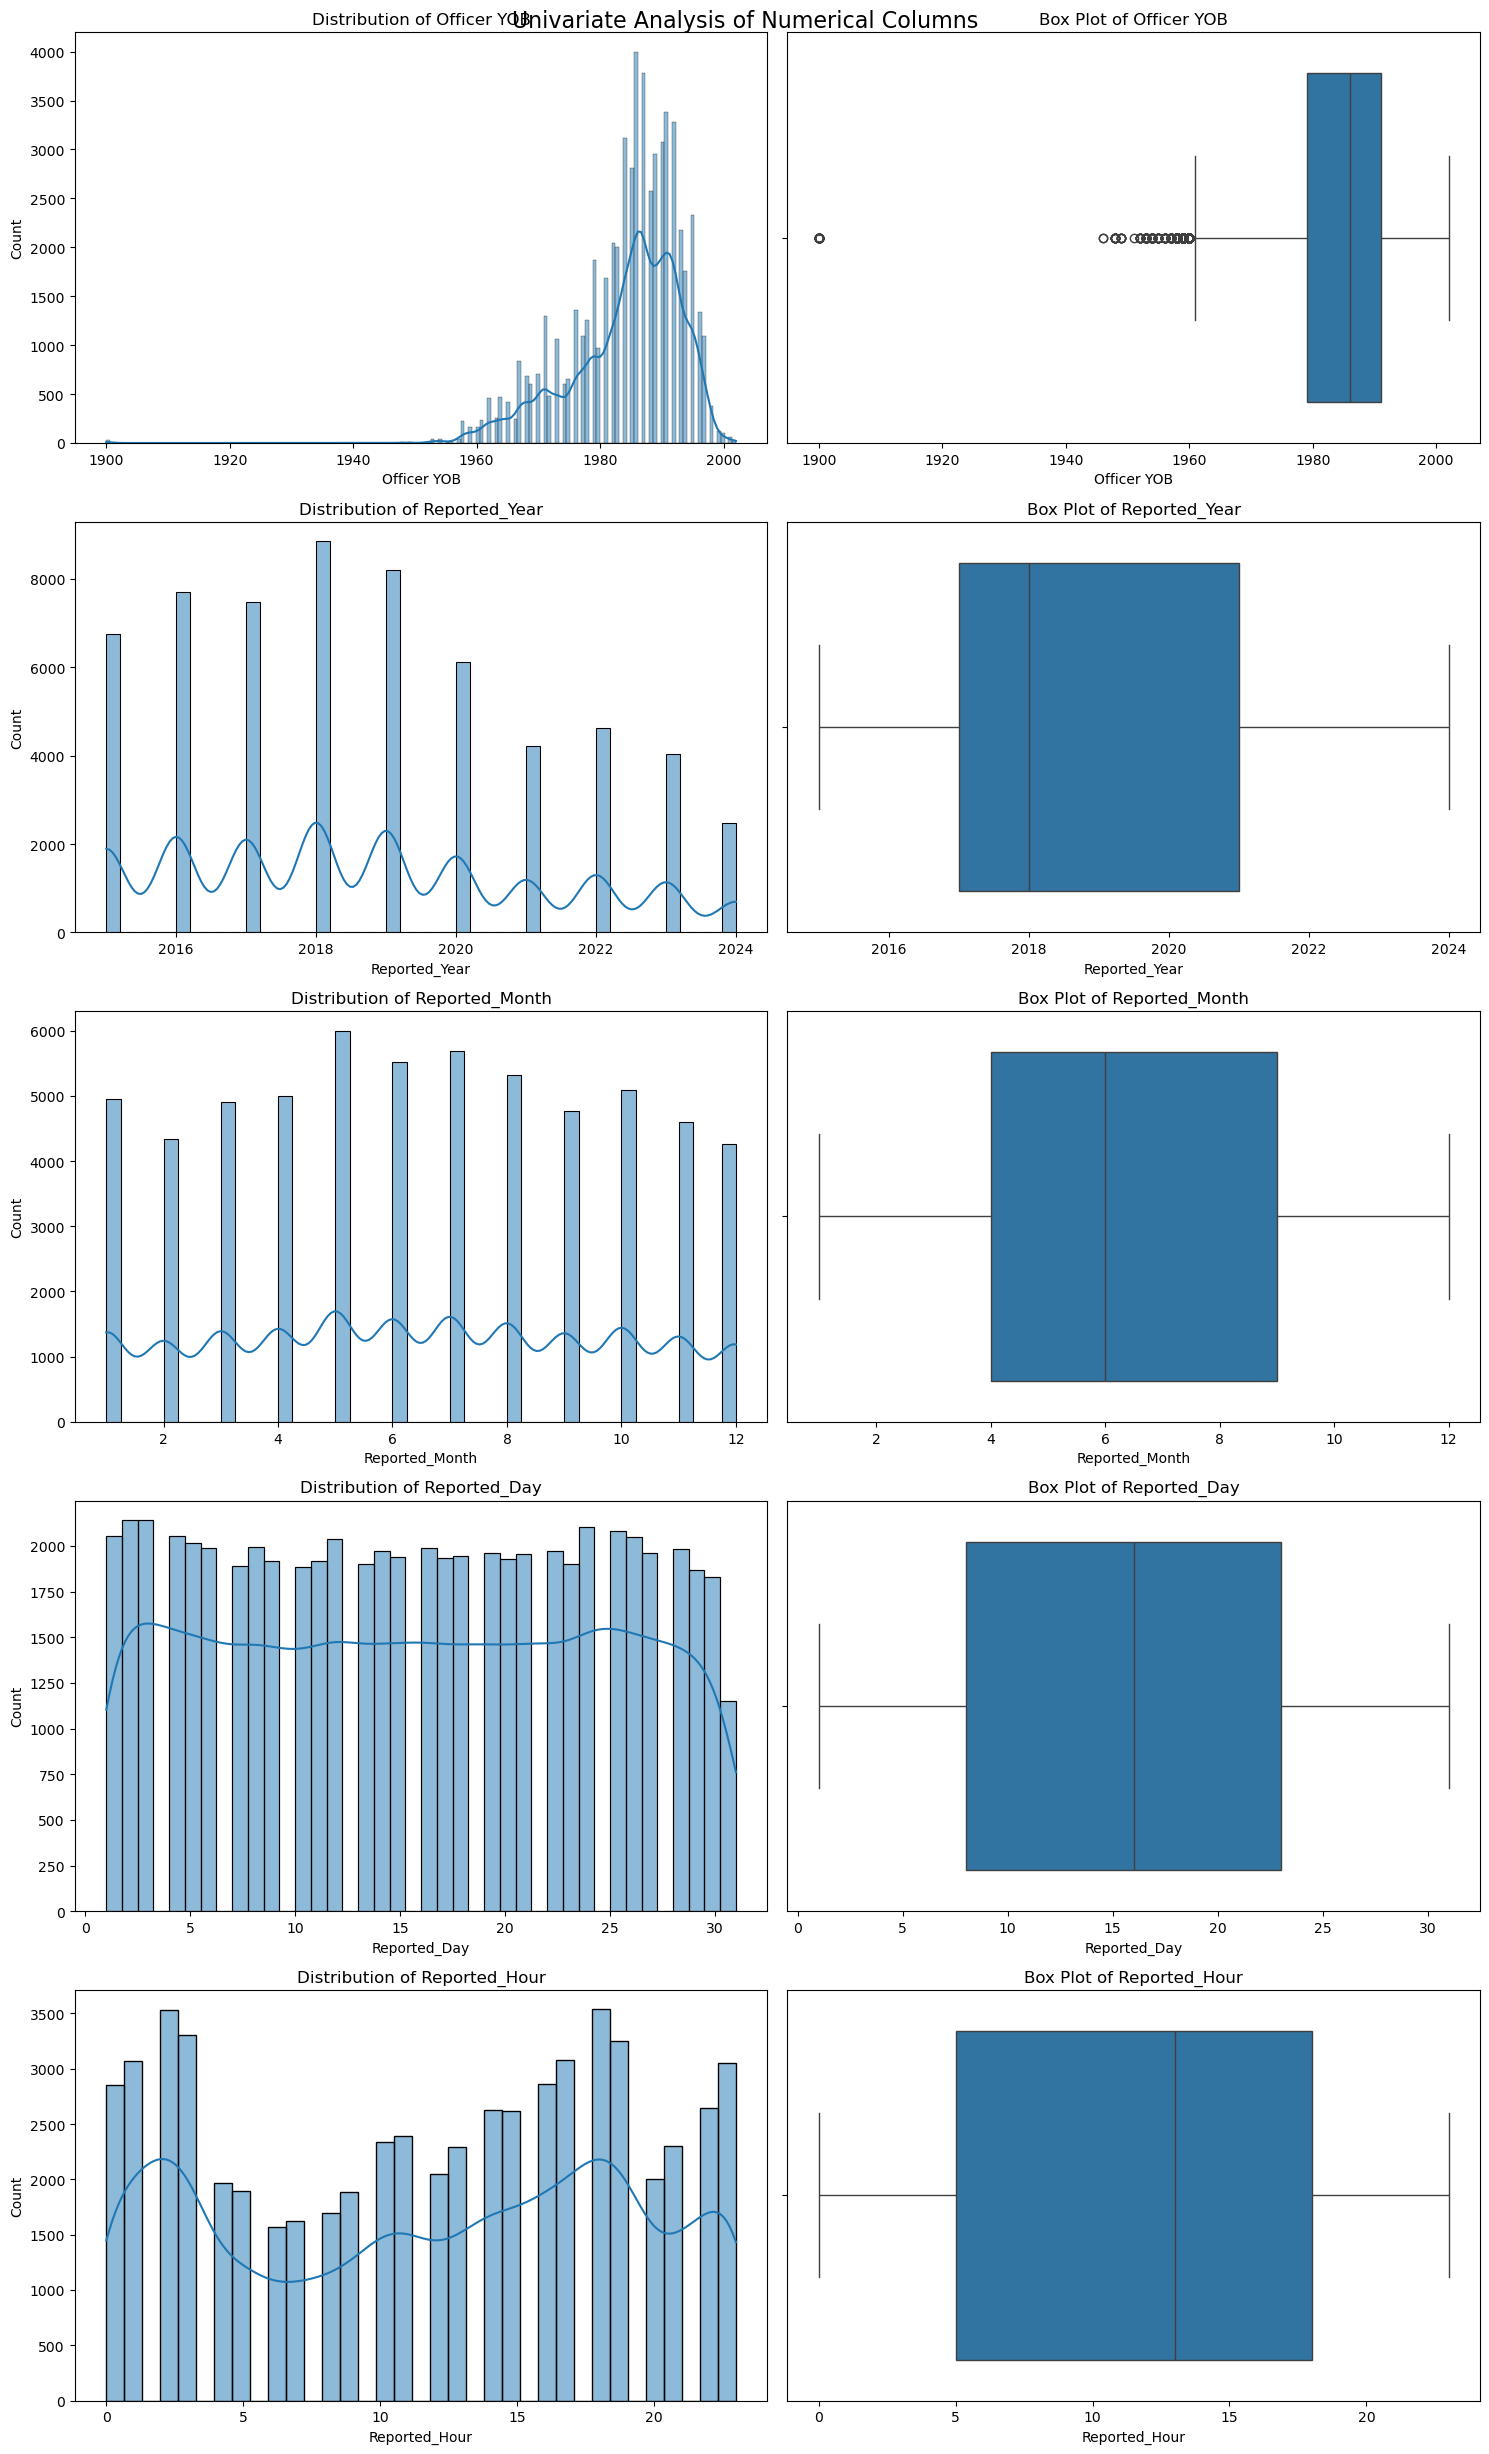

Summary Statistics for Numerical Columns:
        Officer YOB  Reported_Year  Reported_Month  Reported_Day  \
count  60460.000000   60460.000000    60460.000000  60460.000000   
mean    1984.215663    2018.720807        6.442177     15.676629   
std        9.055695       2.580154        3.333334      8.873755   
min     1900.000000    2015.000000        1.000000      1.000000   
25%     1979.000000    2017.000000        4.000000      8.000000   
50%     1986.000000    2018.000000        6.000000     16.000000   
75%     1991.000000    2021.000000        9.000000     23.000000   
max     2002.000000    2024.000000       12.000000     31.000000   

       Reported_Hour  
count   60460.000000  
mean       11.732021  
std         7.235558  
min         0.000000  
25%         5.000000  
50%        13.000000  
75%        18.000000  
max        23.000000  


In [77]:
# Numerical Columns Analysis
numerical_columns = ['Officer YOB', 'Reported_Year', 'Reported_Month', 'Reported_Day', 'Reported_Hour']

fig, axes = plt.subplots(len(numerical_columns), 2, figsize=(15, 5*len(numerical_columns)))
fig.suptitle('Univariate Analysis of Numerical Columns', fontsize=16)

for i, col in enumerate(numerical_columns):
    # Histogram
    sns.histplot(df[col], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribution of {col}')
    axes[i, 0].set_xlabel(col)
    
    # Box plot
    sns.boxplot(x=df[col], ax=axes[i, 1])
    axes[i, 1].set_title(f'Box Plot of {col}')
    axes[i, 1].set_xlabel(col)

plt.tight_layout()
plt.show()

# Summary statistics for numerical columns
numerical_summary = df[numerical_columns].describe()
print("Summary Statistics for Numerical Columns:")
print(numerical_summary)

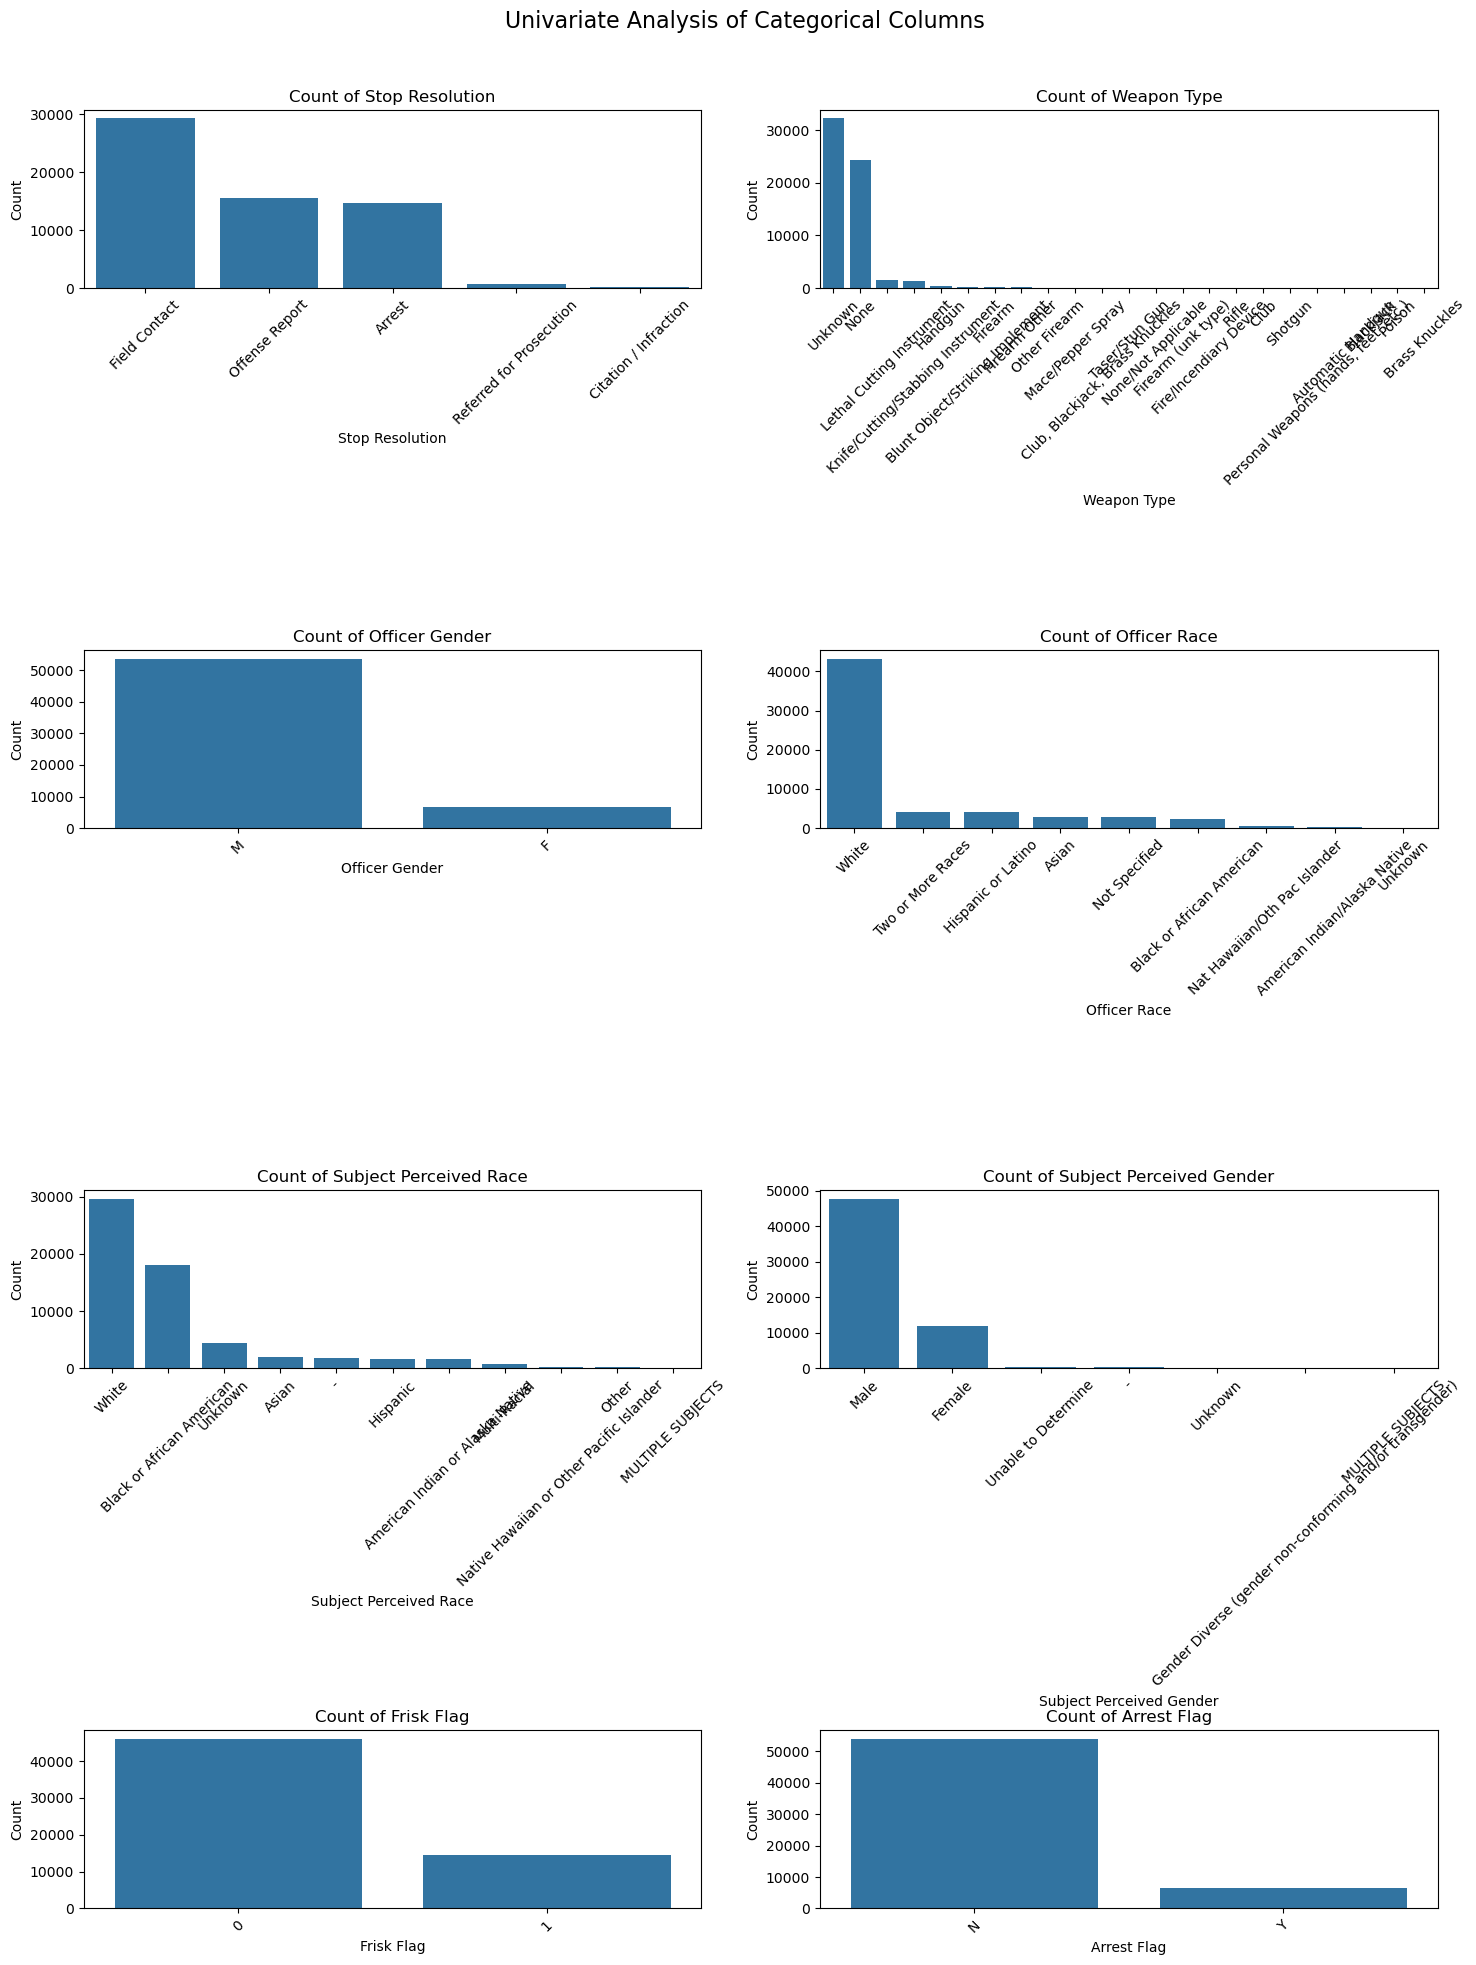

Summary Statistics for Categorical Columns:
       Stop Resolution Weapon Type Officer Gender Officer Race  \
count            60460       60460          60460        60460   
unique               5          23              2            9   
top      Field Contact     Unknown              M        White   
freq             29278       32208          53611        43277   

       Subject Perceived Race Subject Perceived Gender Arrest Flag  
count                   60460                    60460       60460  
unique                     11                        7           2  
top                     White                     Male           N  
freq                    29647                    47728       53910  


In [78]:
# Categorical Columns Analysis
categorical_columns = ['Stop Resolution', 'Weapon Type', 'Officer Gender',
                       'Officer Race', 'Subject Perceived Race',
                       'Subject Perceived Gender', 'Frisk Flag', 'Arrest Flag']

# Determine the grid size for subplots
n_cols = 2  # Number of columns for subplots
n_rows = (len(categorical_columns) + 1) // n_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
fig.suptitle('Univariate Analysis of Categorical Columns', fontsize=16)

# Flatten axes array if necessary for easy iteration
axes = axes.flatten()

# Create bar plots for each categorical column
for i, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f'Count of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

# If there are unused subplots, remove them
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.subplots_adjust(top=0.93)  # Adjusting space for the suptitle
plt.show()

# Summary statistics for categorical columns
categorical_summary = df[categorical_columns].describe(include='object')
print("Summary Statistics for Categorical Columns:")
print(categorical_summary)


## 3.4 Bivariate Analysis

- **Correlation Analysis:** Explore the relationships between numerical features and visualize the correlation matrix and heatmap

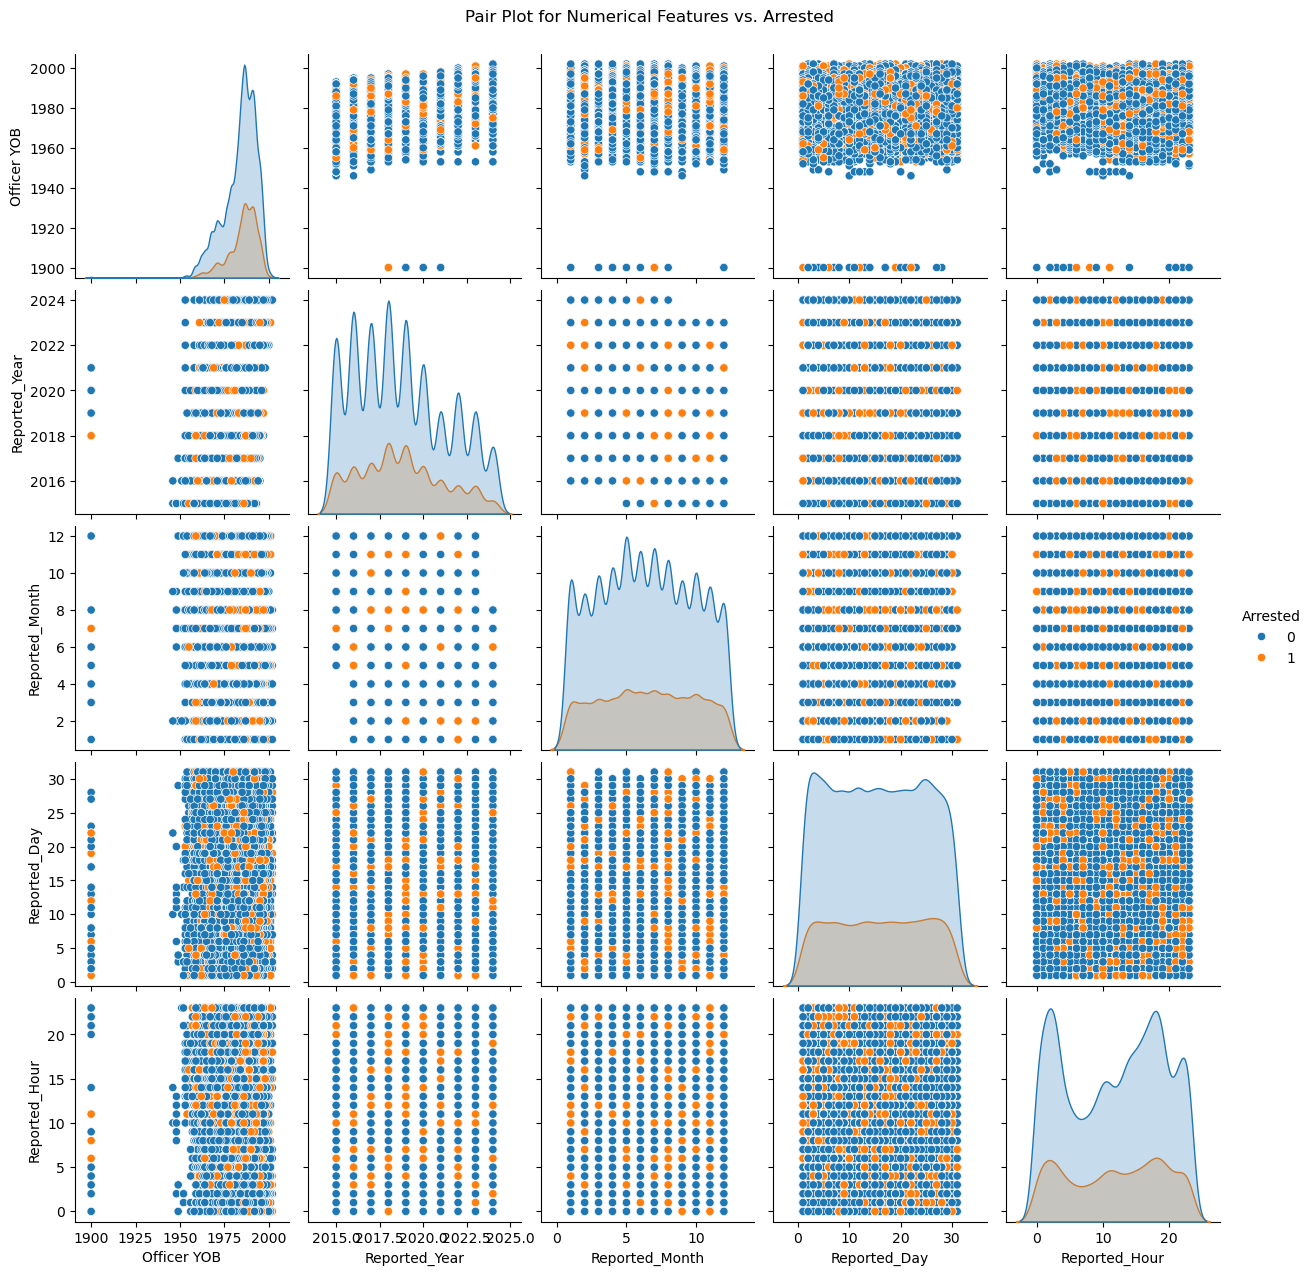

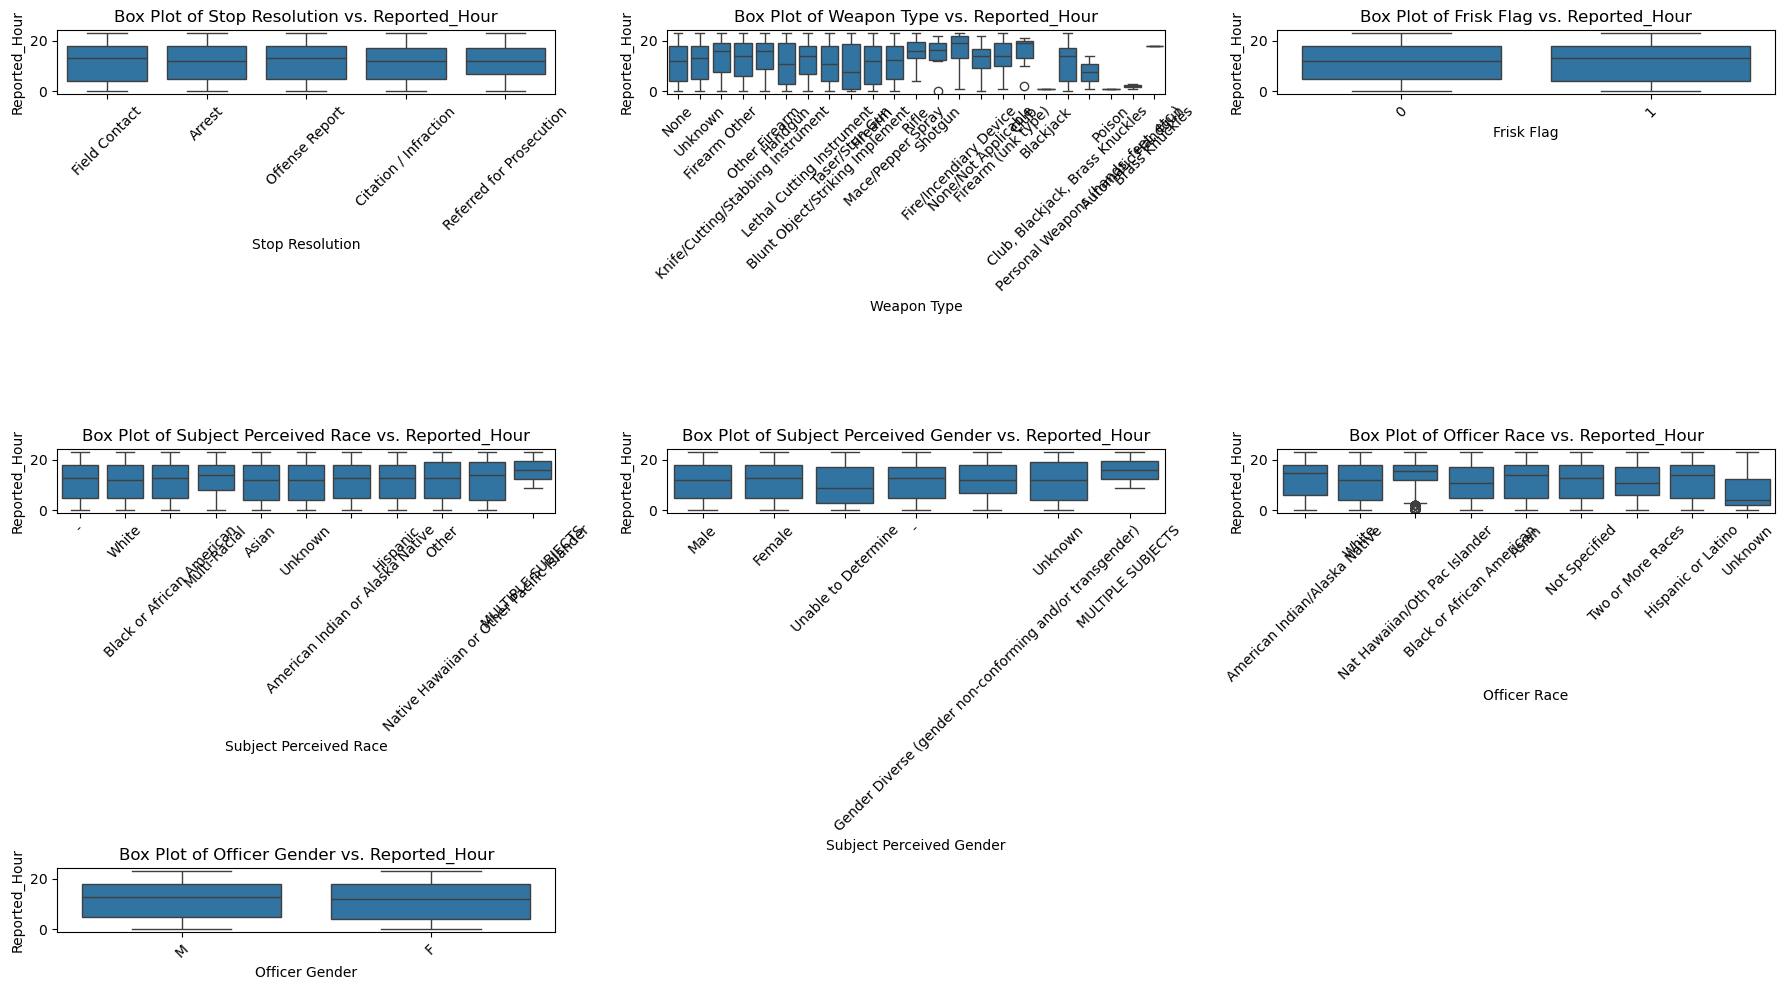

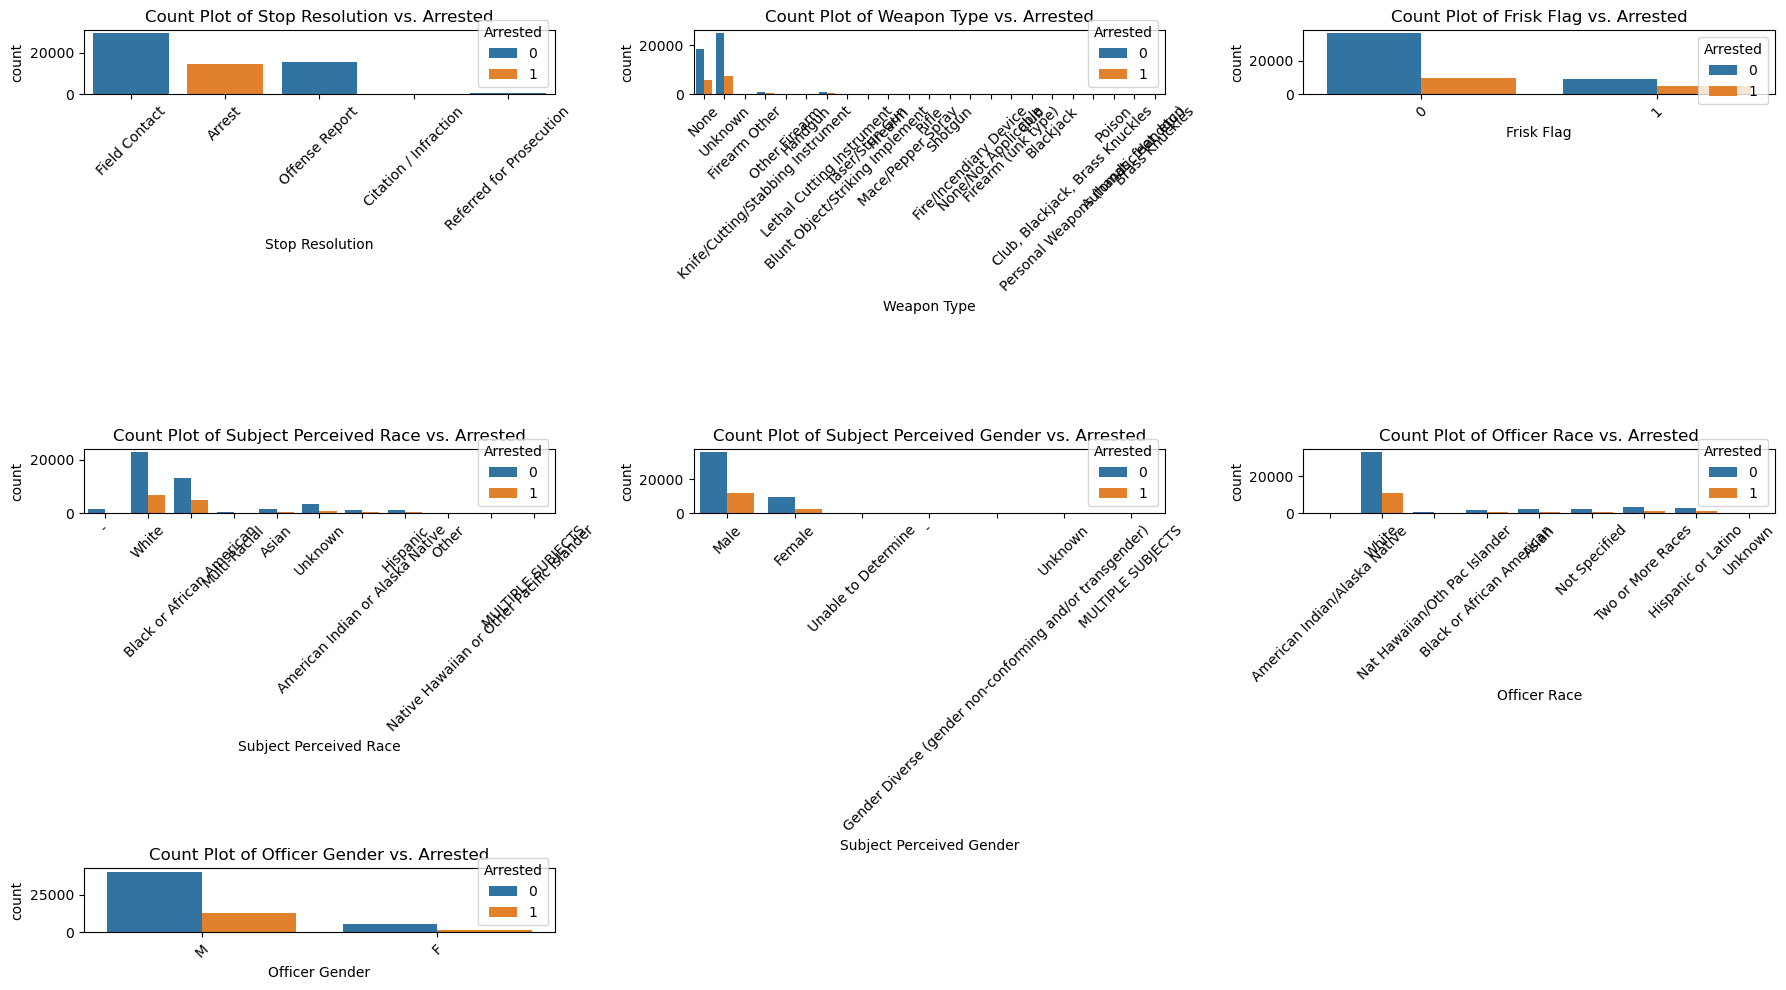

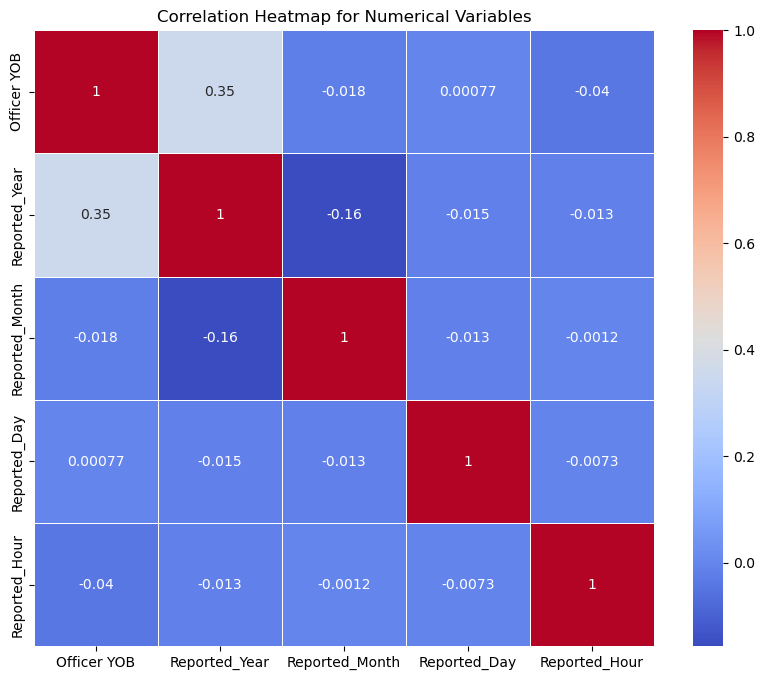

In [63]:


# List of columns to analyze
numerical_columns = ['Officer YOB', 'Reported_Year', 'Reported_Month', 'Reported_Day', 'Reported_Hour']
categorical_columns = ['Stop Resolution', 'Weapon Type', 'Frisk Flag', 'Subject Perceived Race', 'Subject Perceived Gender', 'Officer Race', 'Officer Gender']

# 1. Numerical vs. Numerical: Scatter Plots
sns.pairplot(df[numerical_columns + ['Arrested']], hue='Arrested', diag_kind='kde')
plt.suptitle("Pair Plot for Numerical Features vs. Arrested", y=1.02)
plt.show()

# 2. Categorical vs. Numerical: Box Plots
plt.figure(figsize=(18, 10))
for i, cat_col in enumerate(categorical_columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=cat_col, y='Reported_Hour', data=df)
    plt.xticks(rotation=45)
    plt.title(f'Box Plot of {cat_col} vs. Reported_Hour')
plt.tight_layout()
plt.show()

# 3. Categorical vs. Categorical: Bar Plots
plt.figure(figsize=(18, 10))
for i, cat_col in enumerate(categorical_columns):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=cat_col, hue='Arrested', data=df)
    plt.xticks(rotation=45)
    plt.title(f'Count Plot of {cat_col} vs. Arrested')
plt.tight_layout()
plt.show()

# 4. Correlation Heatmap for Numerical Variables
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap for Numerical Variables")
plt.show()


## Heatmap Observations

1. **Strong Positive Correlation**:
   - There is a strong positive correlation between "Officer YOB" (Year of Birth) and "Reported_Year."
   - As an officer's birth year increases, the reported year tends to increase as well.

2. **Strong Negative Correlation**:
   - There is a strong negative correlation between "Officer YOB" and both "Reported_Month" and "Reported_Day."
   - As the officer's birth year increases, there is a tendency for the reported month and day to decrease.

3. **Weak Correlations**:
   - Most other variables show little to no correlation with each other.
   - For example, "Reported_Month" has almost no correlation with "Reported_Day."

4. **Interpretation**:
   - The heatmap suggests that the officer's birth year is related to the reported year but not strongly correlated with other time-related features.
   - Other factors not captured in this heatmap may influence reporting patterns.


## 3.5 Multivariate Analysis

**Objective:** Analyze the combined effects of multiple variables on the target variable to uncover deeper insights and interactions.

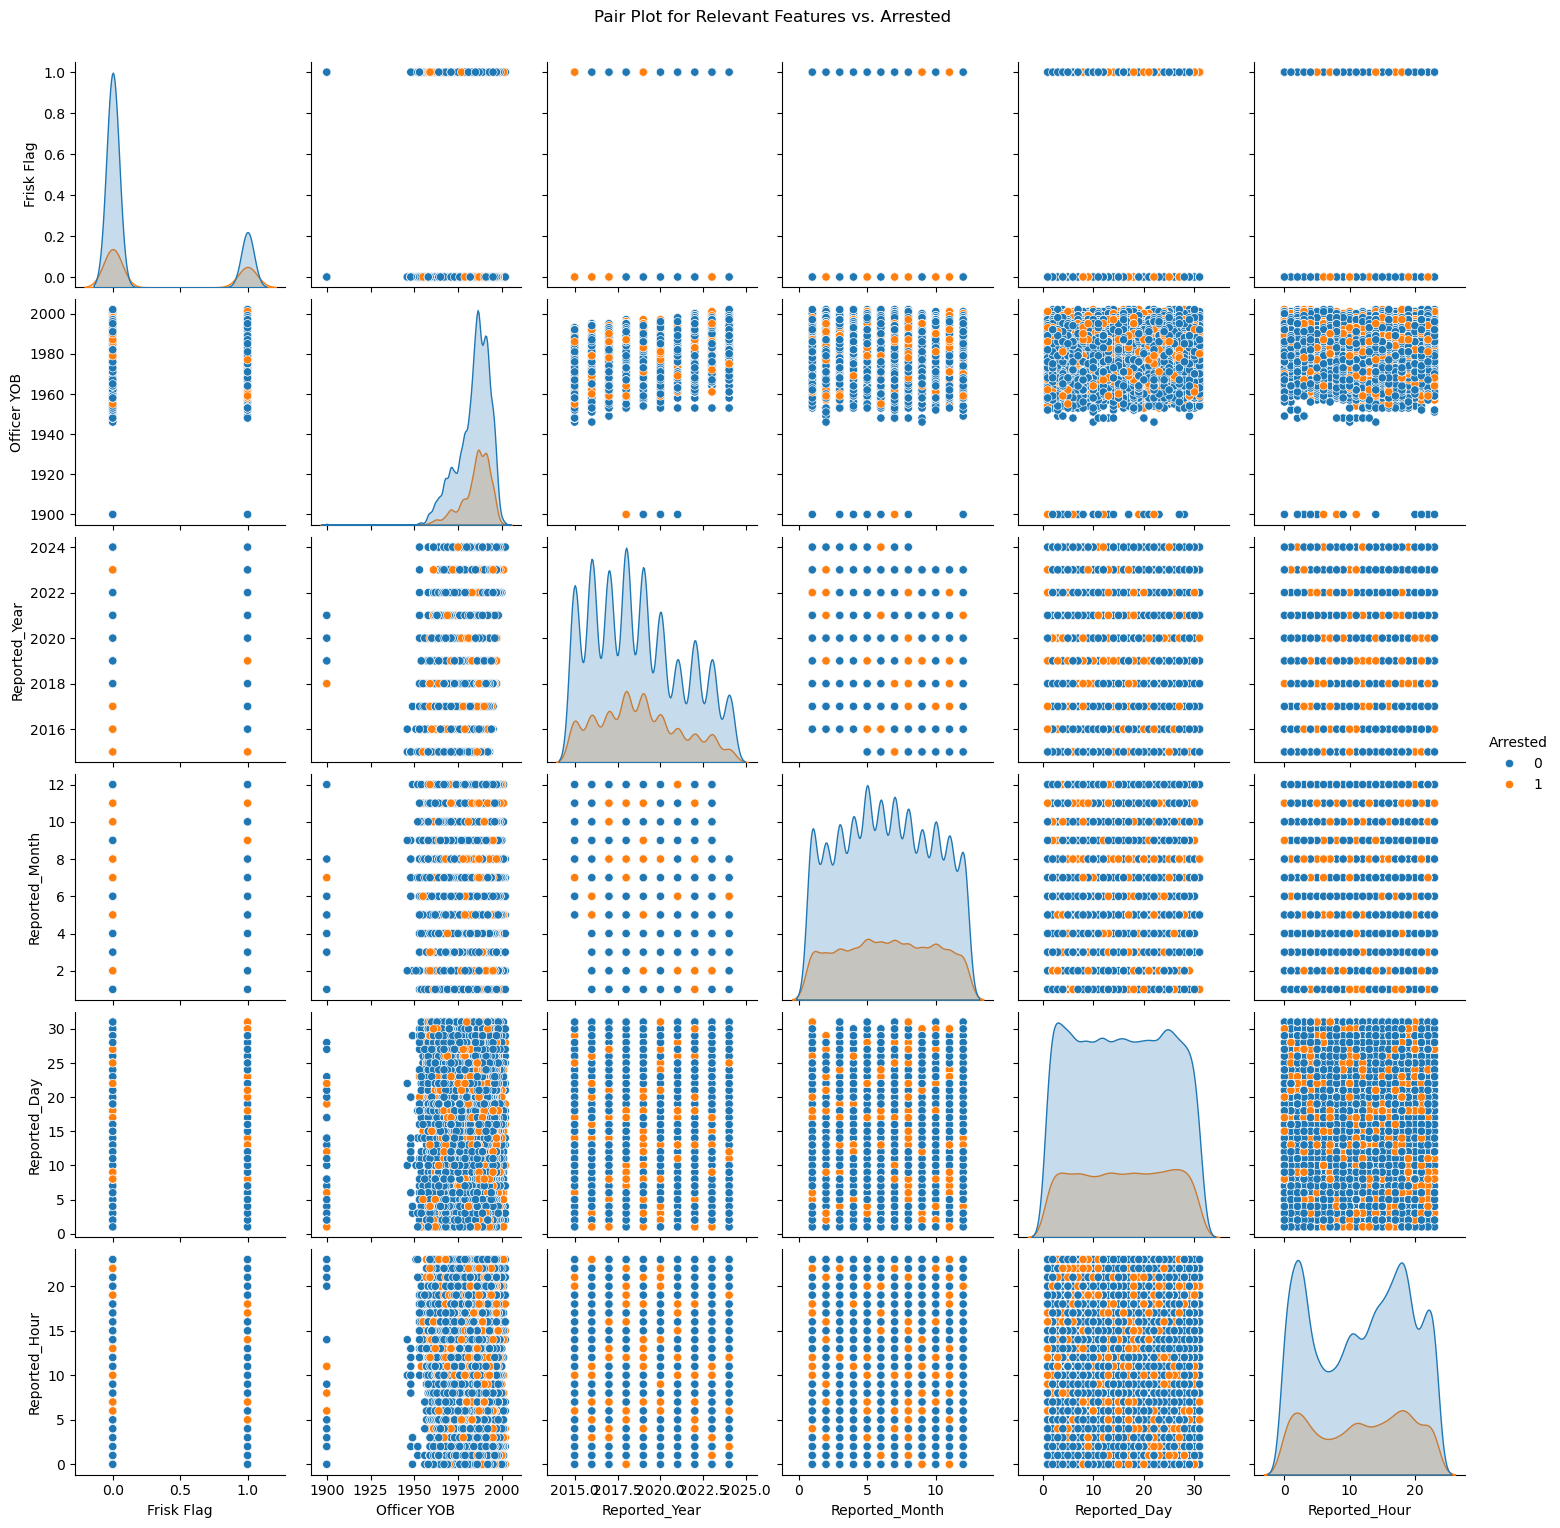

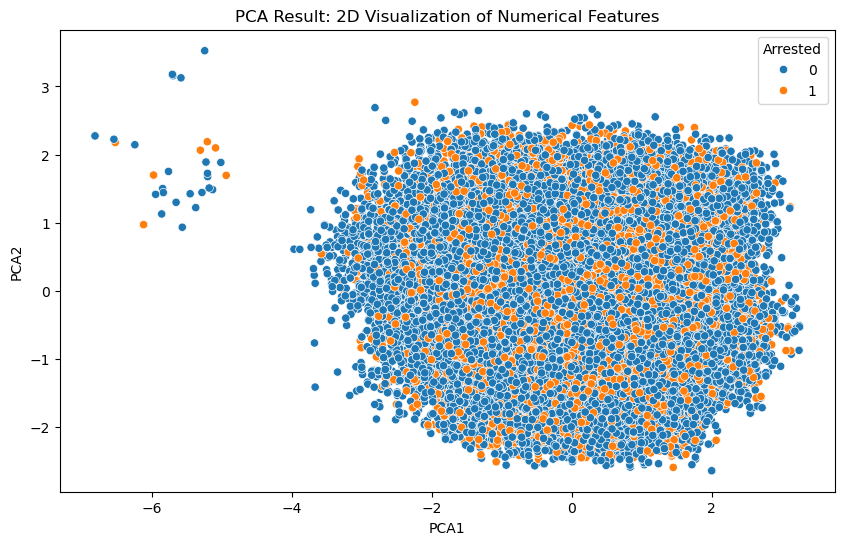

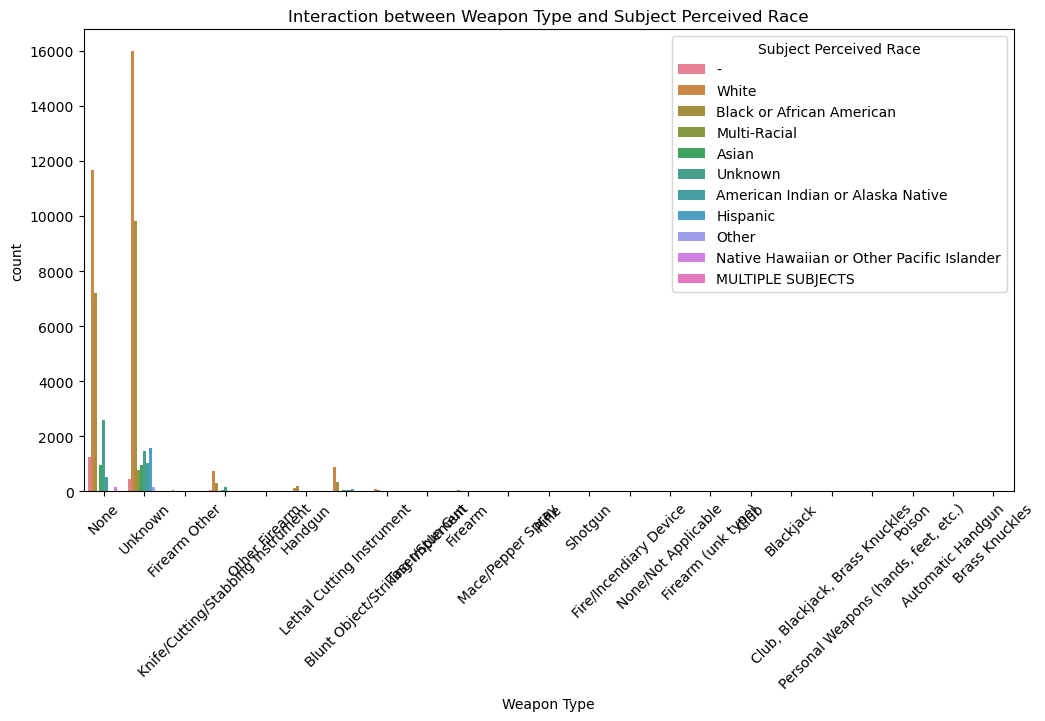

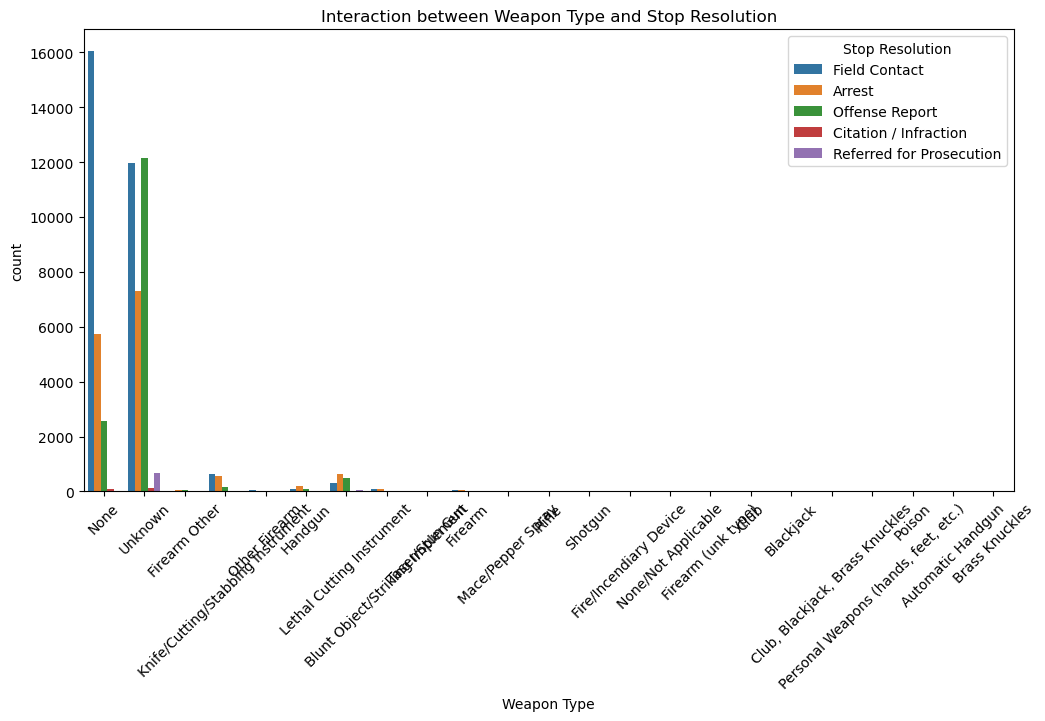

In [83]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA  # Ensure PCA is imported correctly
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame with all relevant columns

# Recommended columns for multivariate analysis
columns_to_analyze = ['Stop Resolution', 'Weapon Type', 'Frisk Flag', 'Officer YOB', 'Subject Perceived Race', 
                      'Subject Perceived Gender', 'Officer Race', 'Officer Gender', 'Reported_Year', 
                      'Reported_Month', 'Reported_Day', 'Reported_Hour', 'Weapon_Precinct_Interaction']

# 1. Pairplot to Visualize Relationships Among Features
sns.pairplot(df[columns_to_analyze + ['Arrested']], hue='Arrested', diag_kind='kde')
plt.suptitle("Pair Plot for Relevant Features vs. Arrested", y=1.02)
plt.show()

# 2. PCA (Principal Component Analysis) for Dimensionality Reduction

# Select numerical columns only for PCA
numerical_columns_for_pca = ['Officer YOB', 'Reported_Year', 'Reported_Month', 'Reported_Day', 'Reported_Hour']

# Standardize the numerical features for PCA
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[numerical_columns_for_pca])

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
pca_result = pca.fit_transform(scaled_features)

# Add PCA results to the DataFrame
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# Visualize PCA Results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Arrested', data=df)
plt.title('PCA Result: 2D Visualization of Numerical Features')
plt.show()

# 3. Interaction Features: Visualizing Interaction Effects

# Example: Interaction effect between 'Weapon Type' and 'Subject Perceived Race'
plt.figure(figsize=(12, 6))
sns.countplot(x='Weapon Type', hue='Subject Perceived Race', data=df)
plt.title('Interaction between Weapon Type and Subject Perceived Race')
plt.xticks(rotation=45)
plt.show()

# Example: Interaction effect between 'Weapon Type' and 'Stop Resolution'
plt.figure(figsize=(12, 6))
sns.countplot(x='Weapon Type', hue='Stop Resolution', data=df)
plt.title('Interaction between Weapon Type and Stop Resolution')
plt.xticks(rotation=45)
plt.show()



## Heatmap Observations

1. **Strong Positive Correlation**:
   - There is a strong positive correlation between "Officer YOB" (Year of Birth) and "Reported_Year."
   - As an officer's birth year increases, the reported year tends to increase as well.

2. **Strong Negative Correlation**:
   - There is a strong negative correlation between "Officer YOB" and both "Reported_Month" and "Reported_Day."
   - As the officer's birth year increases, there is a tendency for the reported month and day to decrease.

3. **Weak Correlations**:
   - Most other variables show little to no correlation with each other (indicated by white or light-colored squares).
   - For example, "Reported_Month" has almost no correlation with "Reported_Day."

4. **Interpretation**:
   - The heatmap suggests that the officer's birth year is related to the reported year but not strongly correlated with other time-related features.
   - Other factors not captured in this heatmap may influence reporting patterns.


                     Officer YOB  Frisk Flag  Weapon_Type_Missing  \
Officer YOB             1.000000    0.038854            -0.296338   
Frisk Flag              0.038854    1.000000            -0.144387   
Weapon_Type_Missing    -0.296338   -0.144387             1.000000   
Reported_Year           0.352310    0.067853            -0.780323   
Reported_Month         -0.018000    0.007906             0.007144   
Reported_Day            0.000765   -0.002727             0.006501   
Reported_Hour          -0.039560    0.009451             0.008183   
Arrested                0.065073    0.143682            -0.040395   
Reported Month         -0.018000    0.007906             0.007144   
Reported Hour          -0.039560    0.009451             0.008183   
PCA1                    0.759939    0.058492            -0.624272   
PCA2                   -0.223311   -0.002603             0.028639   

                     Reported_Year  Reported_Month  Reported_Day  \
Officer YOB               0.352310

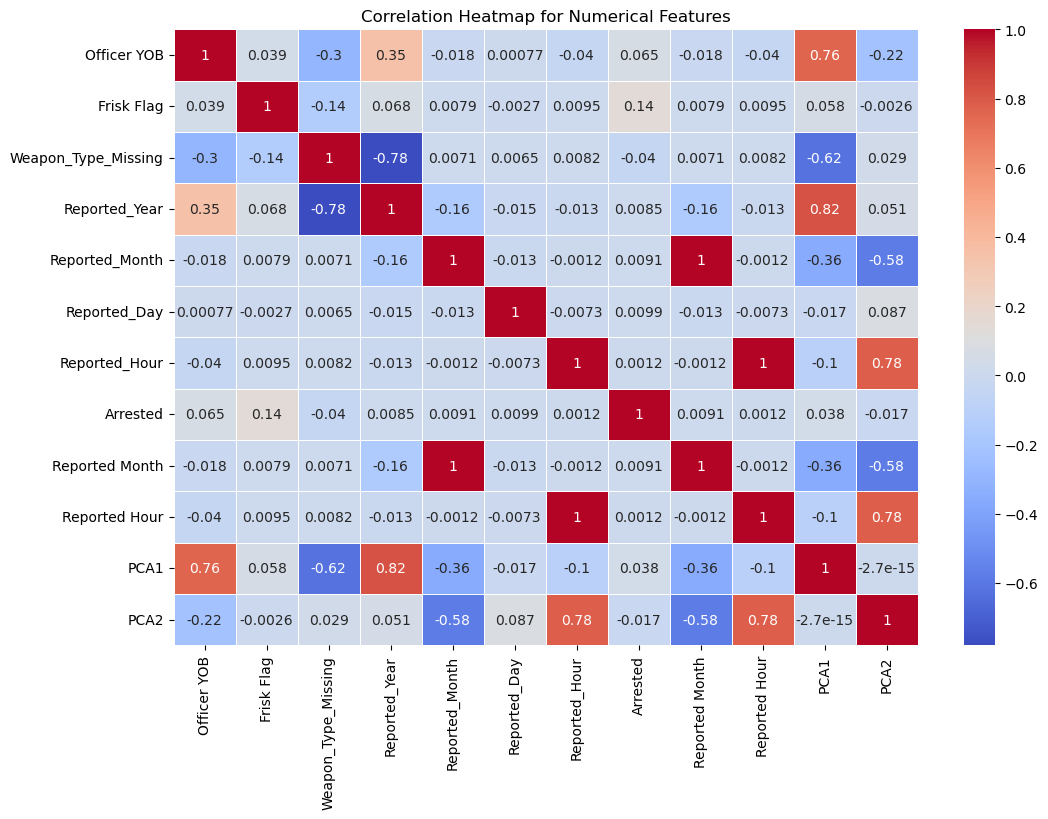

In [86]:
# Selecting numerical columns from the DataFrame 'df'
numeric_data = df.select_dtypes(include=[np.number])

# Calculating the correlation matrix for numerical data
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap for Numerical Features")
plt.show()


##  Checking for Outliers

In the outlier detection section of our project, we will identify and analyze any unusual or extreme values in our dataset that could distort our results or model performance. Outliers can arise from data entry errors, rare events, or natural variations in the data, and may significantly impact the accuracy and reliability of our predictive models.

By detecting and handling these outliers, we aim to ensure our analysis is robust, our models are accurate, and the insights we derive from the data are meaningful. We will use a combination of statistical methods and visualization techniques to identify, assess, and appropriately handle these outliers.

In [54]:
df.columns

Index(['Subject Age Group', 'Stop Resolution', 'Weapon Type', 'Officer YOB',
       'Officer Gender', 'Officer Race', 'Subject Perceived Race',
       'Subject Perceived Gender', 'Arrest Flag', 'Frisk Flag',
       'Weapon_Type_Missing', 'Weapon_Precinct_Interaction', 'Reported_Year',
       'Reported_Month', 'Reported_Day', 'Reported_Hour', 'Age Group',
       'Arrested', 'Reported Month', 'Reported Hour'],
      dtype='object')

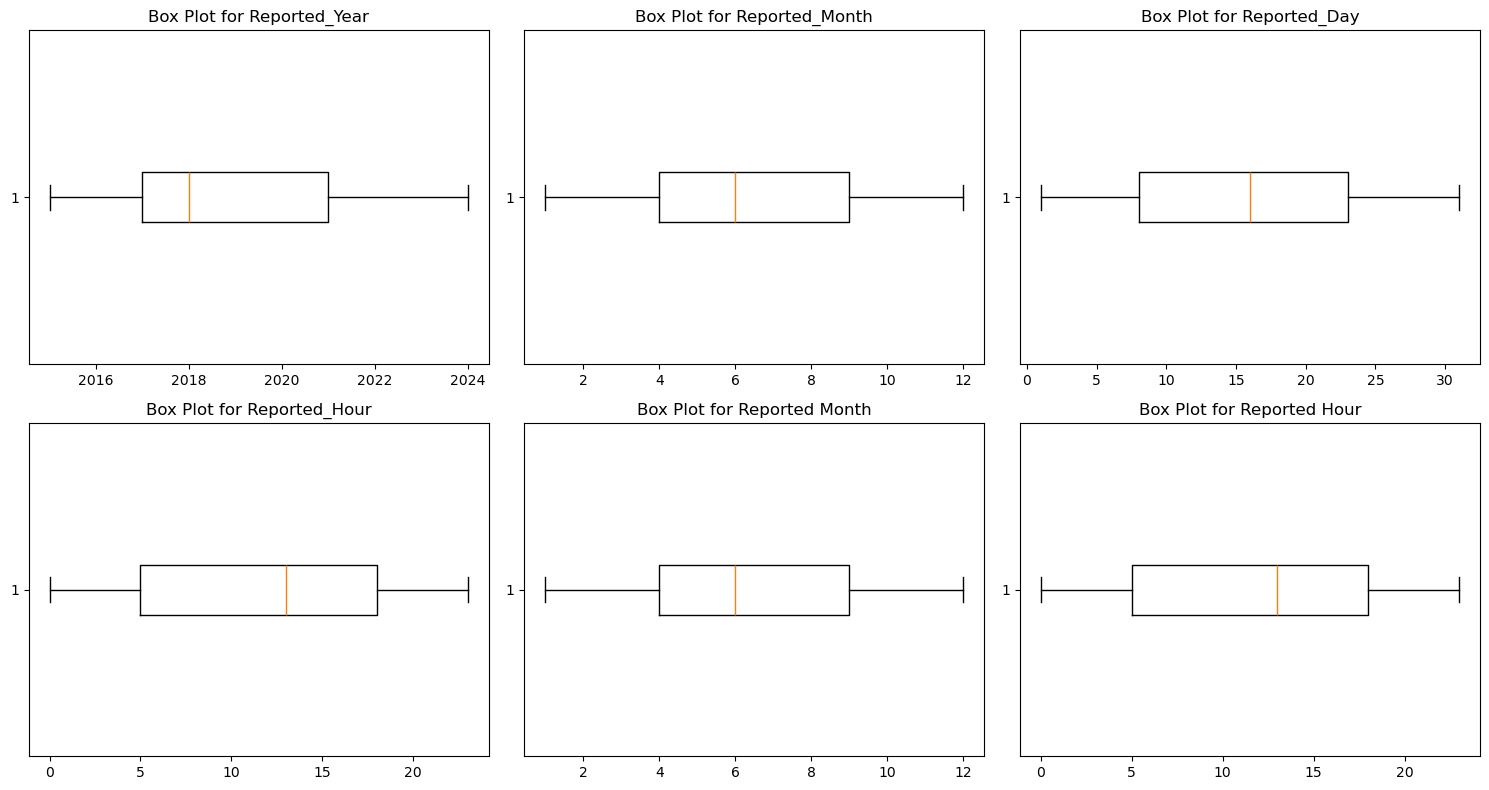

Outliers in Reported_Year using IQR method:
[]
Outliers in Reported_Month using IQR method:
[]
Outliers in Reported_Day using IQR method:
[]
Outliers in Reported_Hour using IQR method:
[]
Outliers in Reported Month using IQR method:
[]
Outliers in Reported Hour using IQR method:
[]

Frequency counts for Subject Perceived Race:
Subject Perceived Race
White                                        29647
Black or African American                    18138
Unknown                                       4379
Asian                                         2062
-                                             1796
Hispanic                                      1674
American Indian or Alaska Native              1651
Multi-Racial                                   802
Native Hawaiian or Other Pacific Islander      158
Other                                          151
MULTIPLE SUBJECTS                                2
Name: count, dtype: int64
Rare categories in Subject Perceived Race (potential outliers

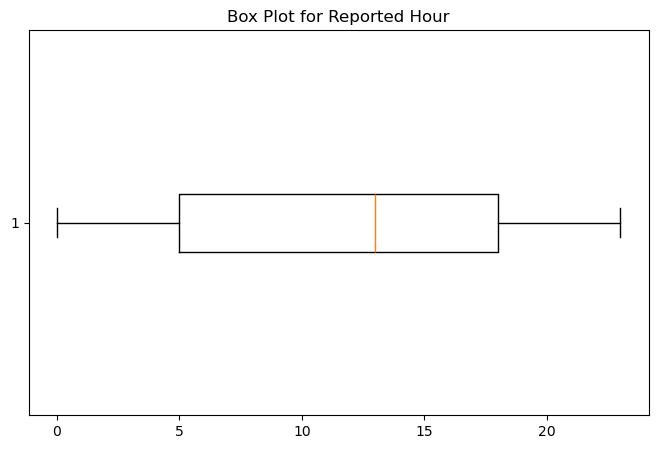

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Assume 'df' is your DataFrame

# List of numerical columns for checking outliers
numerical_columns = ['Reported_Year', 'Reported_Month', 'Reported_Day', 'Reported_Hour', 'Reported Month', 'Reported Hour']

# List of categorical columns
categorical_columns = ['Subject Perceived Race', 'Subject Perceived Gender', 'Weapon Type', 'Frisk Flag', 'Stop Resolution']

# 1. Check Outliers for Numerical Columns using Box Plots and IQR Method
plt.figure(figsize=(15, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)  # Adjusted to fit all numerical columns in the plot
    plt.boxplot(df[column].dropna(), vert=False)
    plt.title(f'Box Plot for {column}')
plt.tight_layout()
plt.show()

# Detect Outliers using IQR for Numerical Columns
for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f'Outliers in {column} using IQR method:')
    print(outliers[column].unique())

# 2. Check for Outliers in Categorical Columns Using Frequency Counts
for column in categorical_columns:
    print(f'\nFrequency counts for {column}:')
    print(df[column].value_counts())
    
    # Detect rare categories (outliers)
    rare_categories = df[column].value_counts()[df[column].value_counts() < 5].index.tolist()
    if rare_categories:
        print(f'Rare categories in {column} (potential outliers): {rare_categories}')

# 3. Analyze 'Reported Hour' for Outliers
# Assuming 'Reported Hour' is another column similar to 'Reported_Hour'
plt.figure(figsize=(8, 5))
plt.boxplot(df['Reported Hour'].dropna(), vert=False)
plt.title('Box Plot for Reported Hour')
plt.show()


Columns in the DataFrame:
['Subject Age Group', 'Stop Resolution', 'Weapon Type', 'Officer YOB', 'Officer Gender', 'Officer Race', 'Subject Perceived Race', 'Subject Perceived Gender', 'Arrest Flag', 'Frisk Flag', 'Weapon_Type_Missing', 'Weapon_Precinct_Interaction', 'Reported_Year', 'Reported_Month', 'Reported_Day', 'Reported_Hour', 'Age Group', 'Arrested', 'Reported Month', 'Reported Hour']

Numerical columns detected:
['Officer YOB', 'Frisk Flag', 'Weapon_Type_Missing', 'Reported_Year', 'Reported_Month', 'Reported_Day', 'Reported_Hour', 'Arrested', 'Reported Month', 'Reported Hour']

Outliers in Officer YOB:
Number of outliers: 768
Percentage of outliers: 1.27%
Lower bound: 1961.0
Upper bound: 2009.0
Min value: 1900
Max value: 2002

Sample of outlier rows:
    Subject Age Group Stop Resolution    Weapon Type  Officer YOB  \
0             36 - 45   Field Contact           None         1957   
25            46 - 55   Field Contact        Unknown         1958   
48            36 - 45  

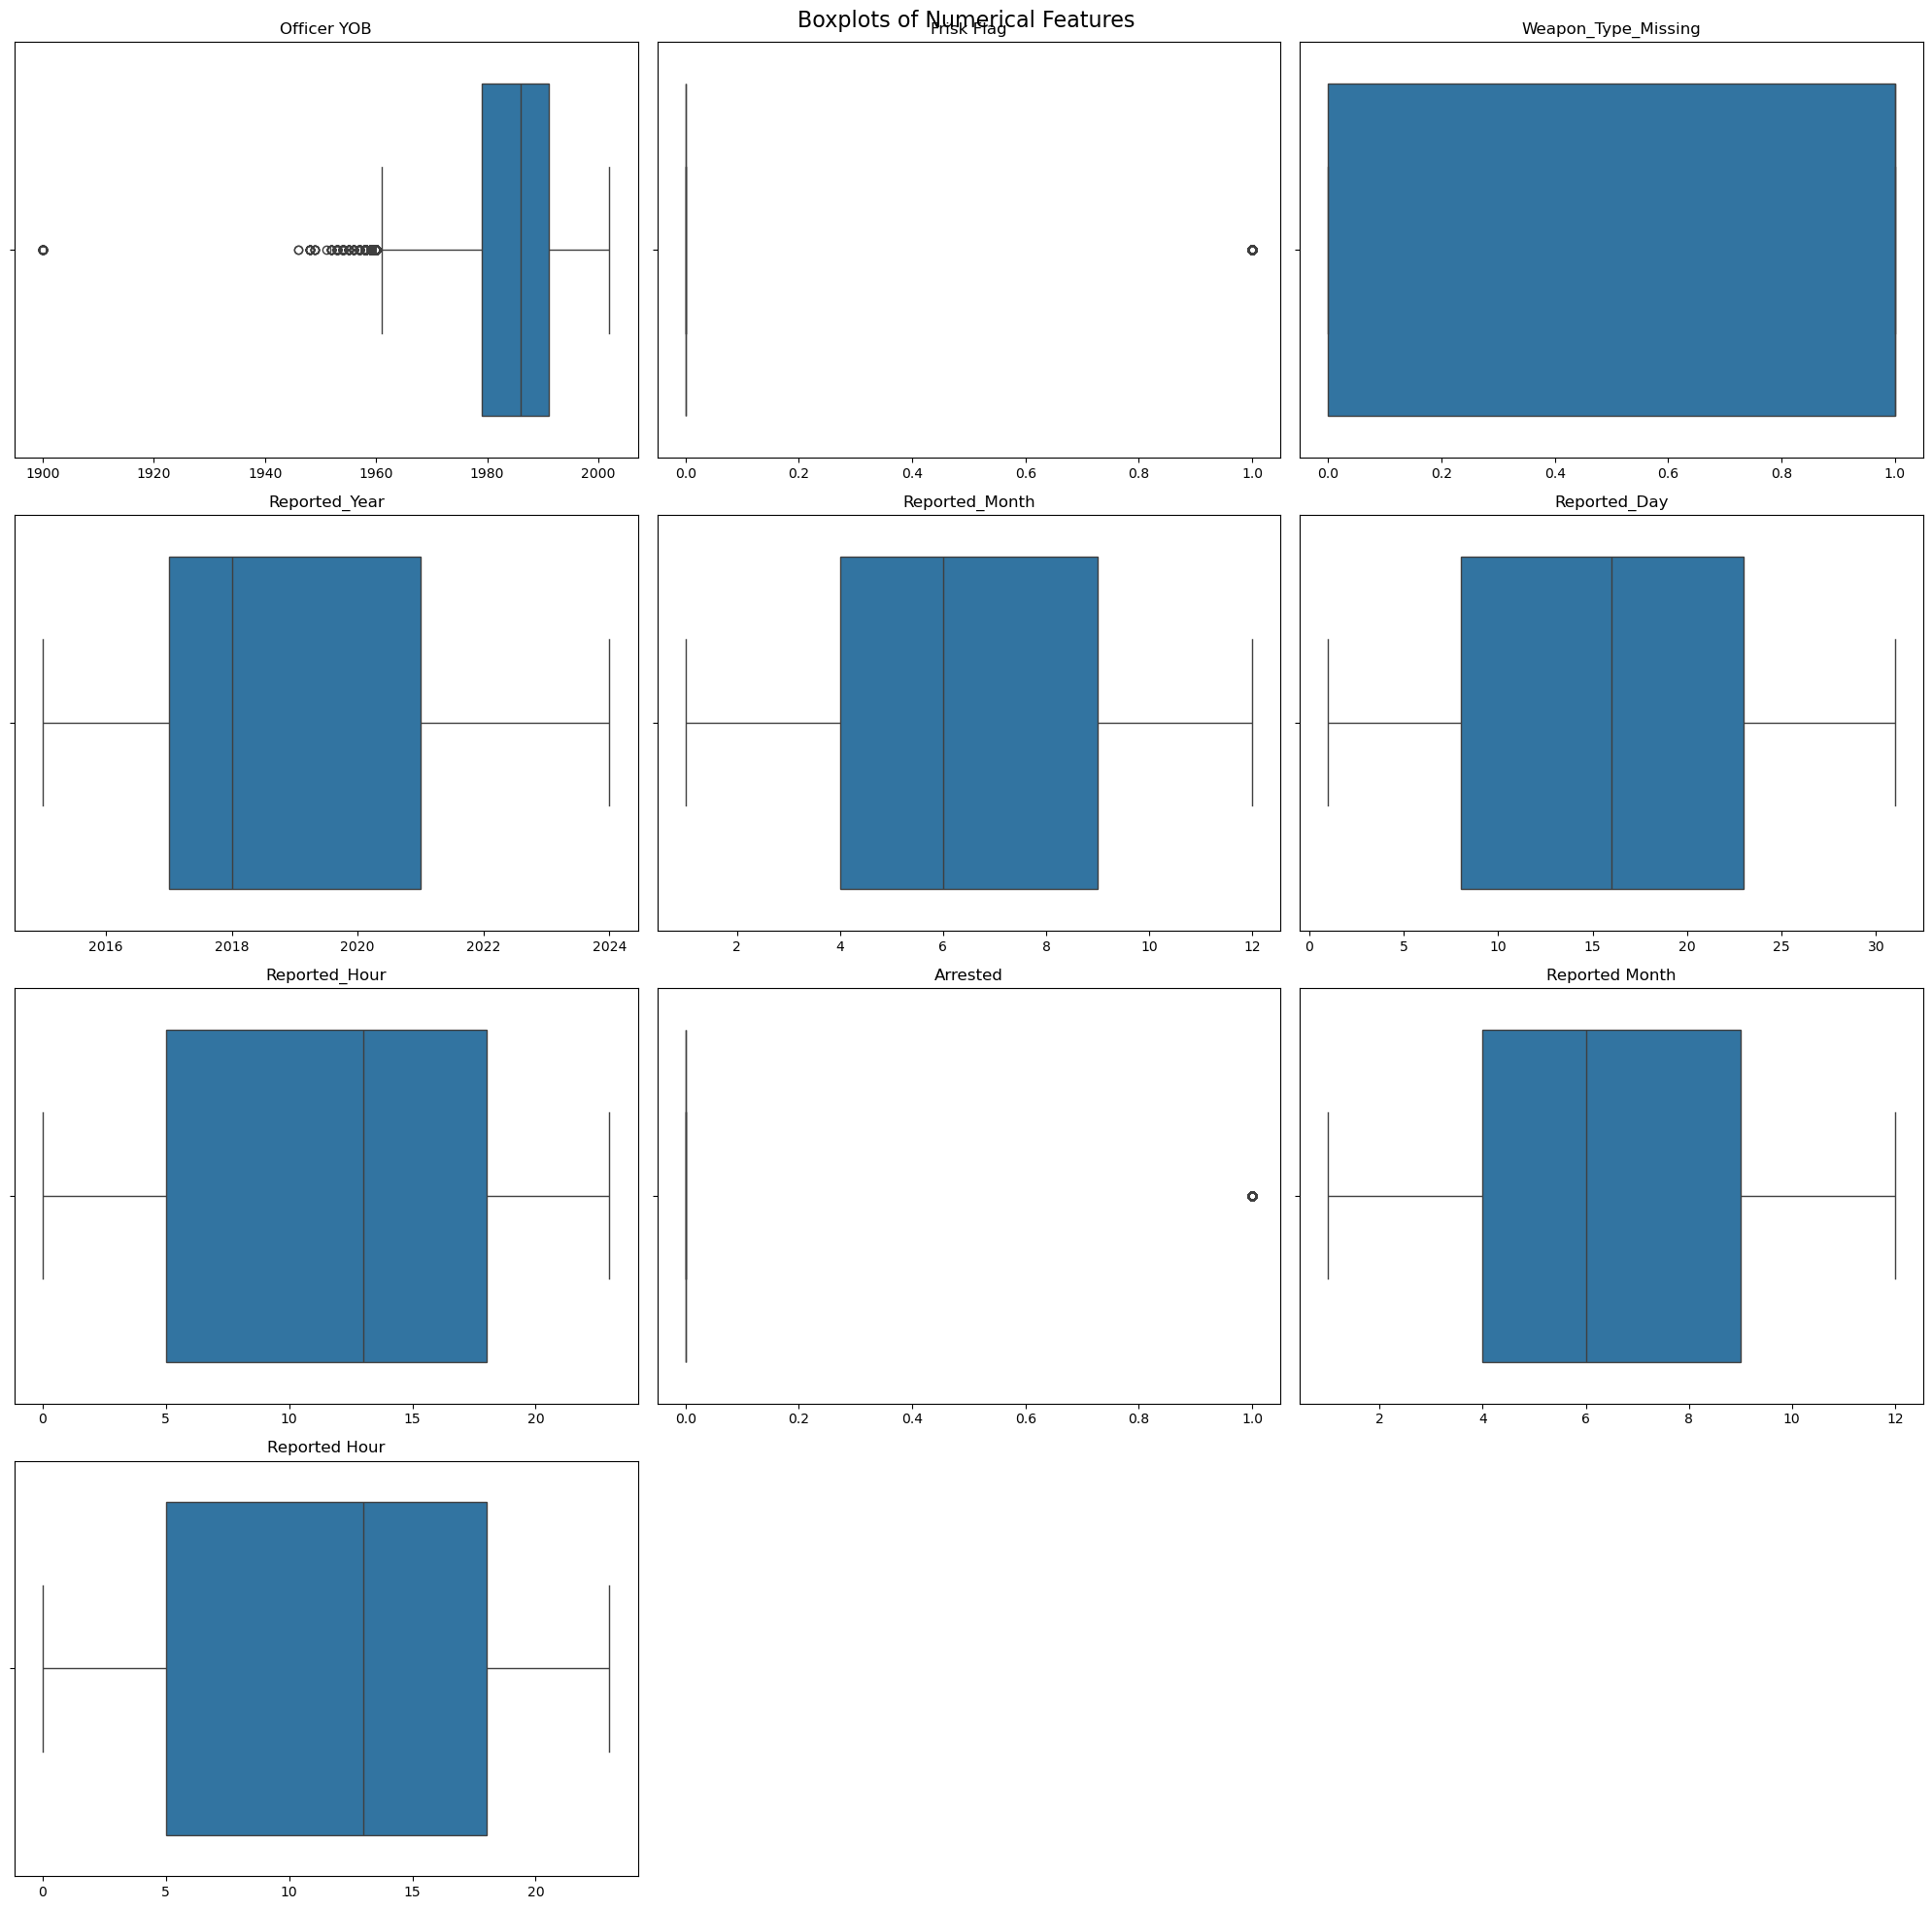

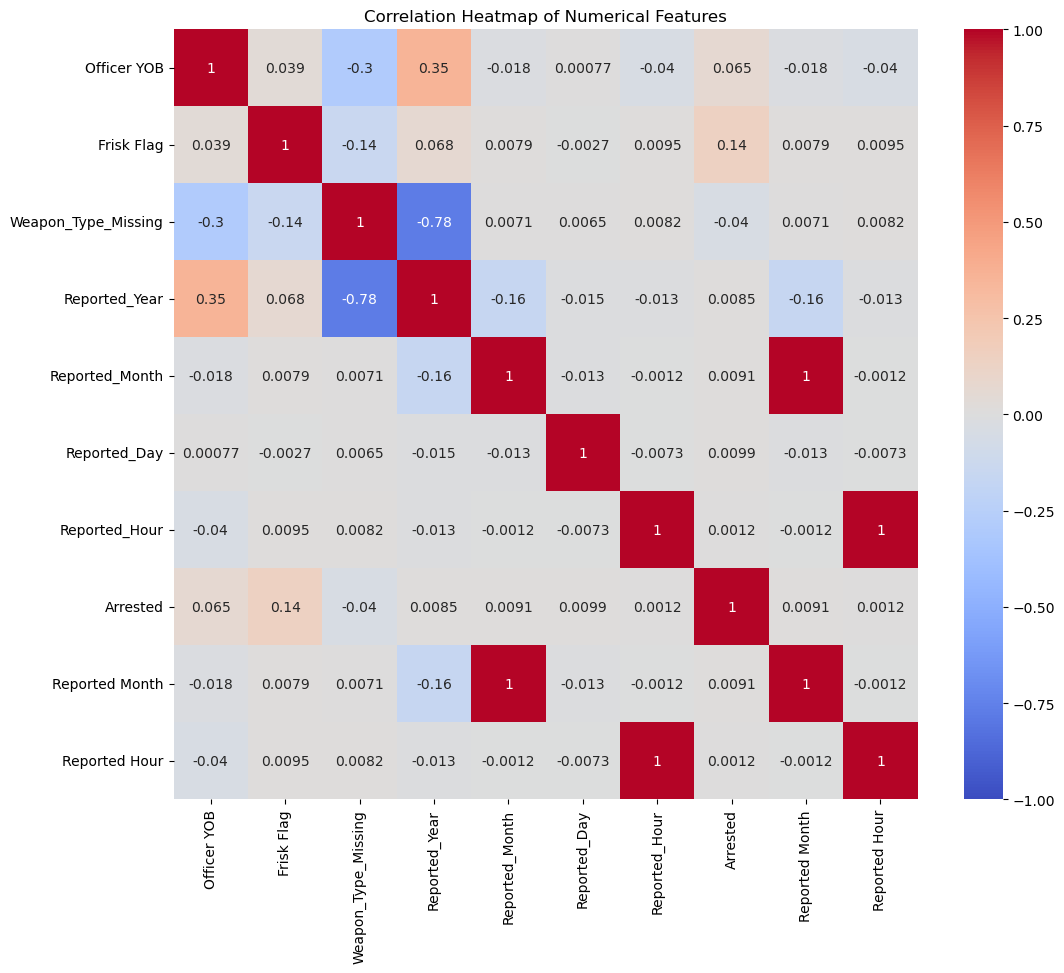

In [56]:

# First, let's check what columns are actually in your DataFrame
print("Columns in the DataFrame:")
print(df.columns.tolist())

# Now, let's define the numerical columns based on what's actually in your DataFrame
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()

print("\nNumerical columns detected:")
print(numerical_columns)

def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Calculate number of rows and columns for subplots
n_cols = 3
n_rows = (len(numerical_columns) - 1) // n_cols + 1

# Create a single figure with multiple subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
fig.suptitle('Boxplots of Numerical Features', fontsize=16)

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Check outliers and plot boxplots for each numerical column
for i, column in enumerate(numerical_columns):
    outliers, lower_bound, upper_bound = detect_outliers(df, column)
    
    print(f"\nOutliers in {column}:")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Percentage of outliers: {len(outliers) / len(df) * 100:.2f}%")
    print(f"Lower bound: {lower_bound}")
    print(f"Upper bound: {upper_bound}")
    print(f"Min value: {df[column].min()}")
    print(f"Max value: {df[column].max()}")
    
    # Plot boxplot in the corresponding subplot
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel('')

    # Display a few outlier rows
    if len(outliers) > 0:
        print("\nSample of outlier rows:")
        print(outliers.head())

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Correlation matrix for numerical columns
correlation_matrix = df[numerical_columns].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()